In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'/Users/weilu/Research/opt_server/')
# from notebookFunctions import *
# from .. import notebookFunctions

from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
from Bio.PDB.Polypeptide import d1_to_index
from Bio.PDB.Polypeptide import dindex_to_1
from Bio.PDB.Polypeptide import aa3

In [3]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [4]:

a = pd.read_csv("/Users/weilu/Research/server/mar_2020/environmental_information/all_data_no_round_cath_with_cbd_info_complete.csv", index_col=0)
# a["D_H"] = a["Density_H_x"] + a["Density_H_y"]
# a["D_P"] = a["Density_P_x"] + a["Density_P_y"]
data2 = a



In [8]:
res_type_map_HP = {
    'C': 0,
    'M': 0,
    'F': 0,
    'I': 0,
    'L': 0,
    'V': 0,
    'W': 0,
    'Y': 0,
    'A': 1,
    'H': 1,
    'T': 1,
    'G': 1,
    'P': 1,
    'D': 1,
    'E': 1,
    'N': 1,
    'Q': 1,
    'R': 1,
    'K': 1,
    'S': 1
}

d_P = 0
d_H = 0
for res in res_type_map_HP.keys():
    density_x = f"Density_{res}_x"
    density_y = f"Density_{res}_y"
    if res_type_map_HP[res] == 1:
        d_P += data2[density_x] + data2[density_y]
    else:
        d_H += data2[density_x] + data2[density_y]
data2["D_H"] = d_H
data2["D_P"] = d_P
data2["D_H_minus_P"] = data2["D_H"] - data2["D_P"]

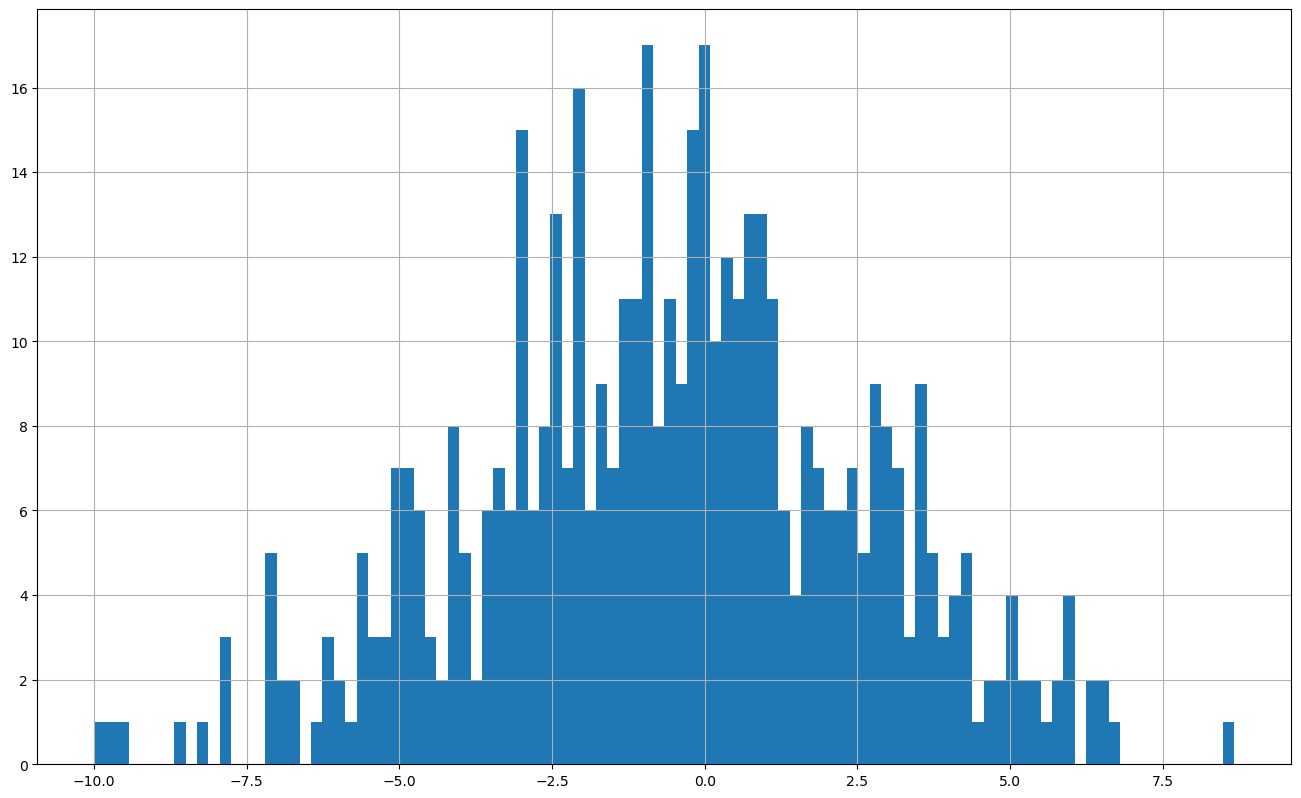

In [10]:
data_selected = data2.query("Res1=='ALA' and Res2=='ALA'").reset_index(drop=True)
data_selected["D_H_minus_P"].hist(bins=100)

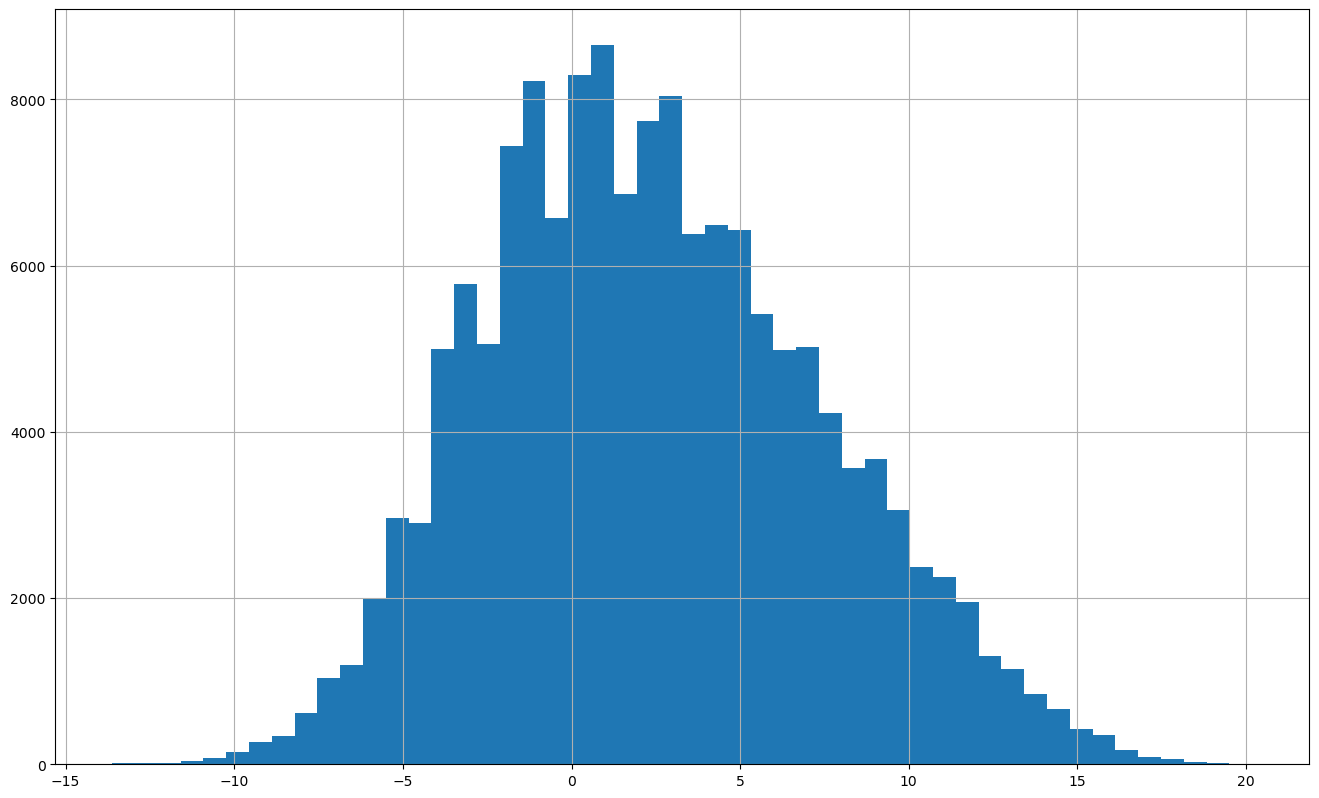

In [12]:
data_selected = data2.reset_index(drop=True)
data_selected["D_H_minus_P"].hist(bins=50)

In [18]:
from sklearn.cluster import KMeans
random_state = 170
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(a)

In [30]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(a)
kmeans.labels_
kmeans.cluster_centers_



array([[1.25029648, 0.03613568, 0.07011055, 0.04977889, 0.26113568,
        0.18598492, 0.06235176, 0.29159296, 0.01654774, 1.3060402 ,
        0.04124623, 0.02443719, 0.03462312, 0.02327638, 0.12198492,
        0.0548995 , 0.06382915, 0.35052261, 0.11629146, 0.14077889],
       [1.19863799, 0.01607885, 0.12024731, 0.17039427, 0.17105735,
        0.29208244, 0.06117563, 0.51558781, 0.04808602, 0.05024014,
        0.06344803, 0.04117204, 0.07151254, 0.09946953, 0.12241935,
        0.12462366, 0.19056631, 0.42996057, 0.0557491 , 0.1359319 ]])

In [36]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=1).fit_transform(a)
X_embedded.shape

(478, 1)

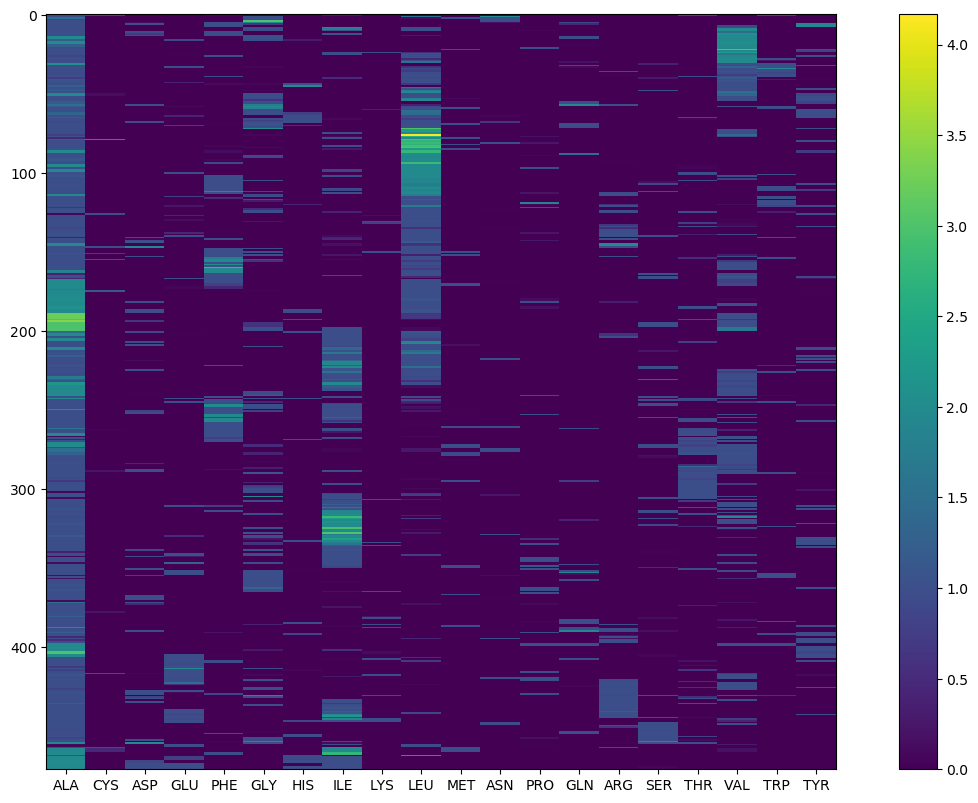

In [41]:
a= data_selected.iloc[:,10:30].values
X_embedded = TSNE(n_components=1).fit_transform(a)
data_selected["tsne"] = X_embedded
data_selected = data_selected.sort_values("tsne").reset_index(drop=True)
a= data_selected.iloc[:,10:30].values
plt.imshow(a, aspect=0.04)
plt.colorbar()
_ = plt.xticks(np.arange(20), aa3)

In [25]:
data_selected

,Res1,Res2,Type,Theta,Index1,Index2,r,ResId1,ResId2,index_x,...,Density_P_y,Density_Q_y,Density_R_y,Density_S_y,Density_T_y,Density_V_y,Density_W_y,Density_Y_y,Protein,MDS
0,ALA,ALA,Direct,1.000,17,55,3.734339,110,148,17,...,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,3m03B00,-3.596614
1,ALA,ALA,Direct,0.933,30,47,5.019618,381,398,30,...,0.001,0.0,0.000,0.000,0.999,1.962,0.0,0.000,1r6bX03,-3.349144
2,ALA,ALA,Direct,0.498,60,154,5.284244,62,267,60,...,0.000,1.0,0.770,0.303,0.001,0.000,0.0,0.000,4bllA01,-3.288712
3,ALA,ALA,Direct,1.000,26,67,3.529446,31,72,26,...,0.000,0.0,0.000,0.000,0.000,2.620,0.0,0.000,1vj7B01,-3.221476
4,ALA,ALA,Direct,1.000,43,98,4.025229,46,117,43,...,0.000,0.0,1.000,0.000,0.000,0.000,0.0,0.000,1fkaG00,-3.100475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,ALA,ALA,Direct,1.000,45,68,4.114999,255,278,45,...,0.000,0.0,0.000,0.000,0.000,1.000,0.0,0.000,1c9bA02,3.179462
474,ALA,ALA,Direct,0.999,11,57,4.547480,16,62,11,...,0.000,0.0,0.000,0.000,0.000,1.996,0.0,0.995,1vj7B01,3.400378
475,ALA,ALA,Direct,1.000,128,150,3.734969,129,151,128,...,0.999,0.0,0.002,0.000,0.000,0.000,0.0,0.000,3ct5A00,3.453491
476,ALA,ALA,Direct,1.000,90,109,3.934208,279,298,90,...,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,1ltmA02,3.573741


In [13]:
from sklearn.manifold import MDS

data_selected = data2.query("Res1=='ALA' and Res2=='ALA'").reset_index(drop=True)
a= data_selected.iloc[:,10:30].values

embedding = MDS(n_components=1)
X_transformed = embedding.fit_transform(a)
X_transformed.shape

(478, 1)

In [17]:
data_selected

,Res1,Res2,Type,Theta,Index1,Index2,r,ResId1,ResId2,index_x,...,Density_P_y,Density_Q_y,Density_R_y,Density_S_y,Density_T_y,Density_V_y,Density_W_y,Density_Y_y,Protein,MDS
0,ALA,ALA,Direct,1.000,17,55,3.734339,110,148,17,...,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,3m03B00,-3.596614
1,ALA,ALA,Direct,0.933,30,47,5.019618,381,398,30,...,0.001,0.0,0.000,0.000,0.999,1.962,0.0,0.000,1r6bX03,-3.349144
2,ALA,ALA,Direct,0.498,60,154,5.284244,62,267,60,...,0.000,1.0,0.770,0.303,0.001,0.000,0.0,0.000,4bllA01,-3.288712
3,ALA,ALA,Direct,1.000,26,67,3.529446,31,72,26,...,0.000,0.0,0.000,0.000,0.000,2.620,0.0,0.000,1vj7B01,-3.221476
4,ALA,ALA,Direct,1.000,43,98,4.025229,46,117,43,...,0.000,0.0,1.000,0.000,0.000,0.000,0.0,0.000,1fkaG00,-3.100475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,ALA,ALA,Direct,1.000,45,68,4.114999,255,278,45,...,0.000,0.0,0.000,0.000,0.000,1.000,0.0,0.000,1c9bA02,3.179462
474,ALA,ALA,Direct,0.999,11,57,4.547480,16,62,11,...,0.000,0.0,0.000,0.000,0.000,1.996,0.0,0.995,1vj7B01,3.400378
475,ALA,ALA,Direct,1.000,128,150,3.734969,129,151,128,...,0.999,0.0,0.002,0.000,0.000,0.000,0.0,0.000,3ct5A00,3.453491
476,ALA,ALA,Direct,1.000,90,109,3.934208,279,298,90,...,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,1ltmA02,3.573741


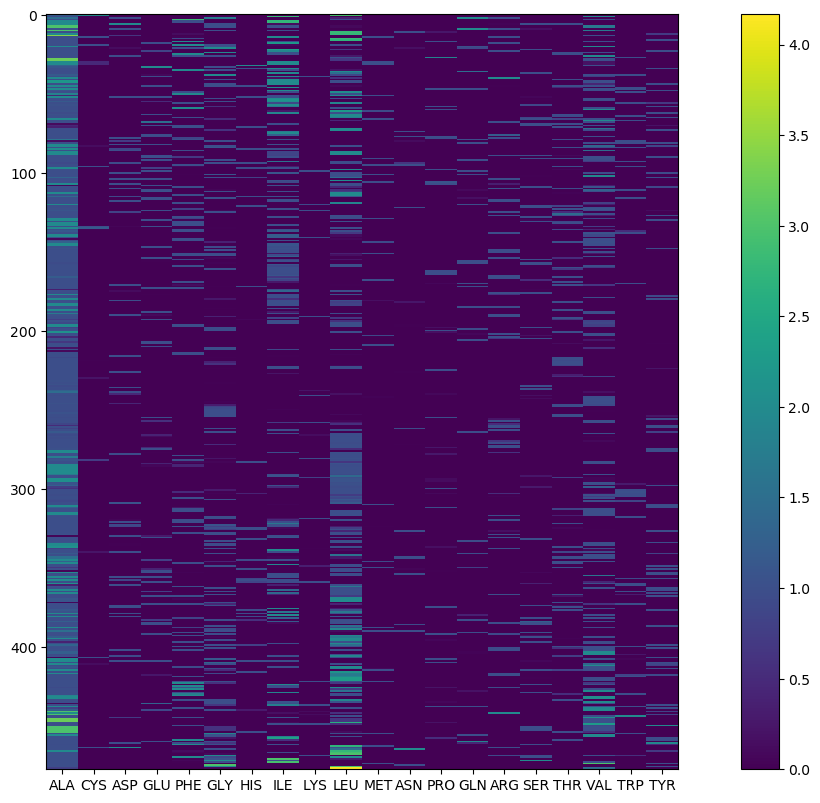

In [16]:
data_selected["MDS"] = X_transformed
data_selected = data_selected.sort_values("MDS").reset_index(drop=True)
a= data_selected.iloc[:,10:30].values
plt.imshow(a, aspect=0.05)
plt.colorbar()
_ = plt.xticks(np.arange(20), aa3)


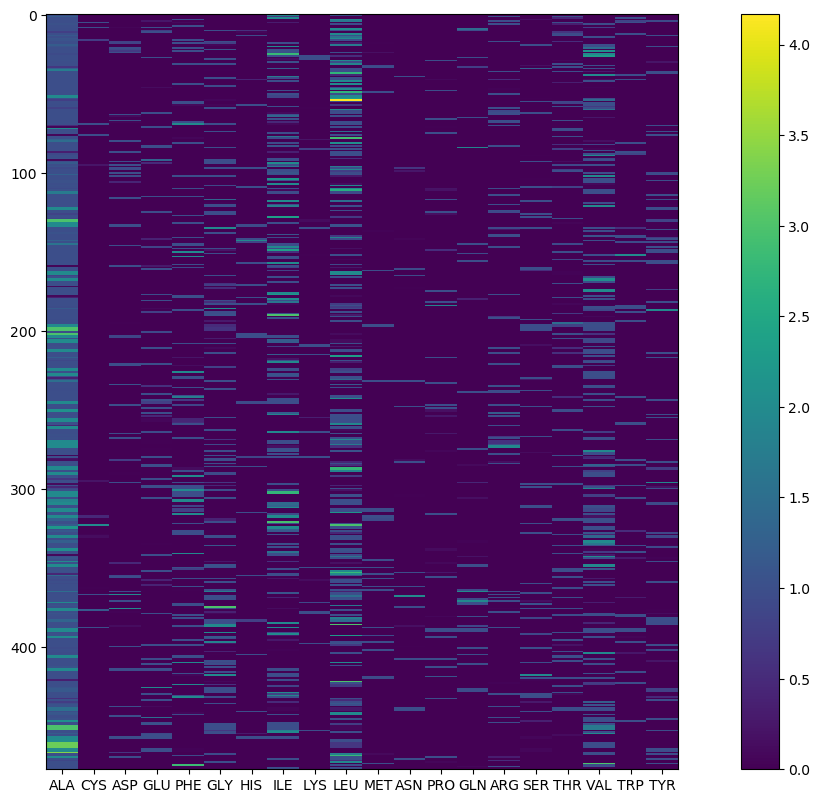

In [8]:
data_selected = data2.query("Res1=='ALA' and Res2=='ALA'").reset_index(drop=True)
a= data_selected.iloc[:,10:30].values
plt.imshow(a, aspect=0.05)
plt.colorbar()
_ = plt.xticks(np.arange(20), aa3)

In [42]:
data_selected = data2.query("Res1=='LEU' and Res2=='LEU'").reset_index(drop=True)
a= data_selected.iloc[:,10:30].values
plt.imshow(a, aspect=0.005)
plt.colorbar()
_ = plt.xticks(np.arange(20), aa3)

In [42]:
res_type_map_HP = {
    'C': 0,
    'M': 0,
    'F': 0,
    'I': 0,
    'L': 0,
    'V': 0,
    'W': 0,
    'Y': 0,
    'A': 1,
    'H': 1,
    'T': 1,
    'G': 1,
    'P': 1,
    'D': 1,
    'E': 1,
    'N': 1,
    'Q': 1,
    'R': 1,
    'K': 1,
    'S': 1
}

d_P = 0
d_H = 0
for res in res_type_map_HP.keys():
    density_x = f"Density_{res}_x"
    density_y = f"Density_{res}_y"
    if res_type_map_HP[res] == 1:
        d_H += data2[density_x] + data2[density_y]
    else:
        d_P += data2[density_x] + data2[density_y]
data2["D_H"] = d_H
data2["D_P"] = d_P

In [55]:
res_type_map_poloar_noplar = {
    'C': 0,    'M': 0,    'F': 0,    'I': 0,    'L': 0,    'V': 0,    'W': 0,    'G': 0,    'P': 0,  'A': 0,
    'Y': 1,    'H': 1,    'T': 1,    'D': 1,    'E': 1,    'N': 1,    'Q': 1,    'R': 1,    'K': 1,  'S': 1
}

d_noP = 0
d_P = 0
for res in res_type_map_poloar_noplar.keys():
    density_x = f"Density_{res}_x"
    density_y = f"Density_{res}_y"
    if res_type_map_poloar_noplar[res] == 1:
        d_P += data2[density_x] + data2[density_y]
    else:
        d_noP += data2[density_x] + data2[density_y]
data2["D_NoPolar"] = d_noP
data2["D_Polar"] = d_P

In [4]:
a = pd.read_csv("/Users/weilu/Research/server/mar_2020/environmental_information/all_data_no_round_cath_with_cbd_info.csv", index_col=0)
a["D_H"] = a["Density_H_x"] + a["Density_H_y"]
a["D_P"] = a["Density_P_x"] + a["Density_P_y"]
data2 = a


In [56]:
data2["D_NoPolar_minus_Polar"] = data2["D_NoPolar"] - data2["D_Polar"]

In [45]:
data2["D_H_minus_P"] = data2["D_H"] - data2["D_P"]

In [ ]:
["I", "L", "V"]

In [54]:
data_selected.iloc[:,10:30].sum().sort_values()

Density_C_x     11.677
Density_N_x     16.350
Density_K_x     16.709
Density_M_x     25.910
Density_P_x     26.842
Density_H_x     29.476
Density_Q_x     32.384
Density_W_x     38.696
Density_S_x     45.695
Density_D_x     47.501
Density_E_x     57.446
Density_R_x     58.430
Density_T_x     65.870
Density_Y_x     65.940
Density_F_x     99.691
Density_G_x    118.502
Density_V_x    189.713
Density_I_x    201.876
Density_L_x    273.919
Density_A_x    583.229
dtype: float64

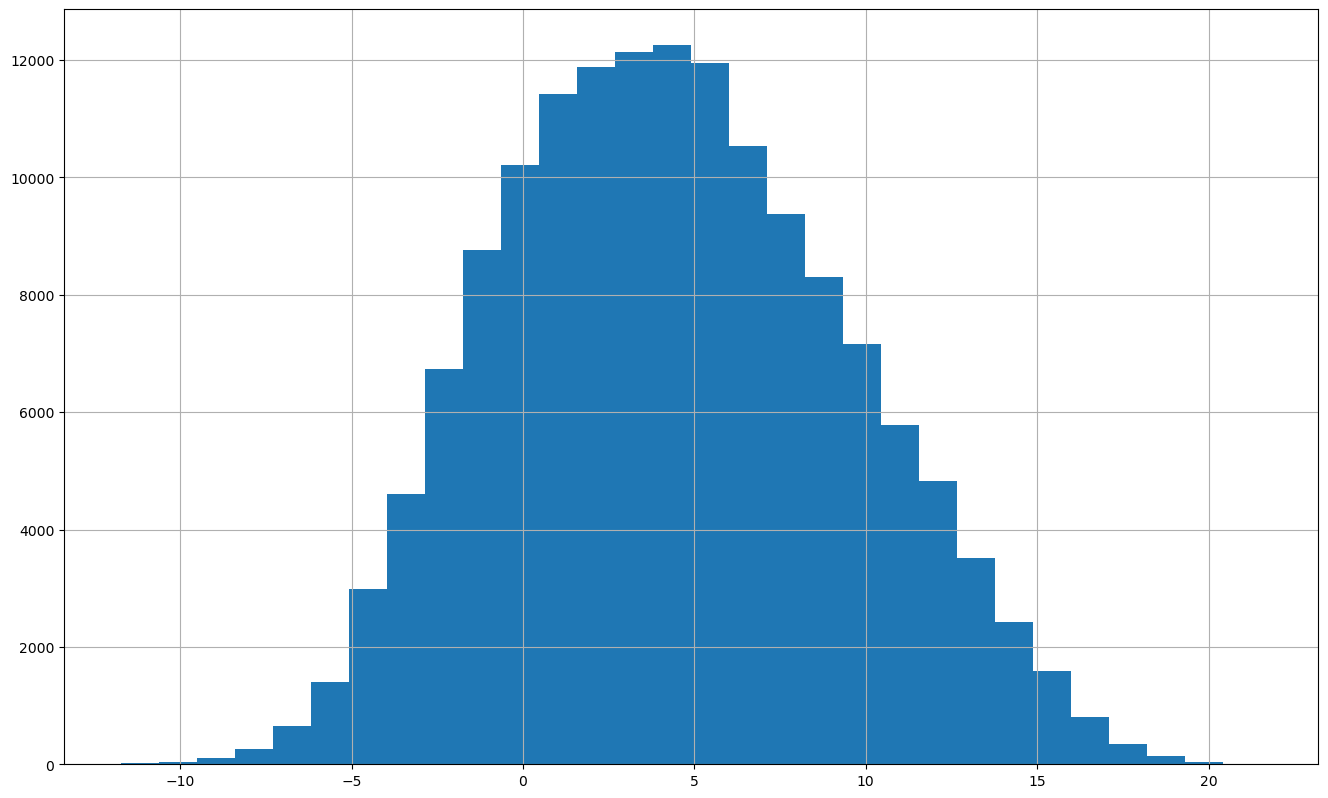

In [60]:
data2["D_NoPolar_minus_Polar"].hist(bins=30)

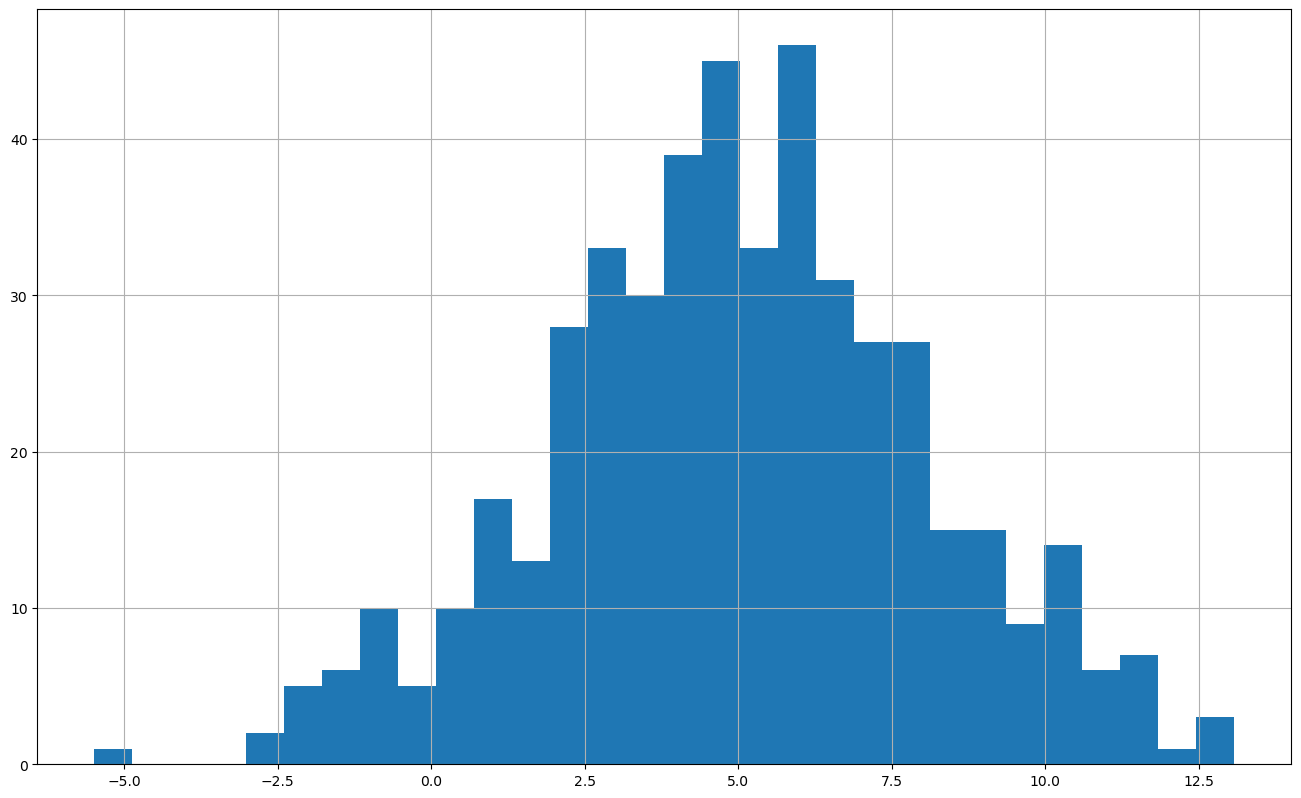

In [59]:
data_selected = data2.query("Res1=='ALA' and Res2=='ALA'").reset_index(drop=True)
data_selected["D_NoPolar_minus_Polar"].hist(bins=30)

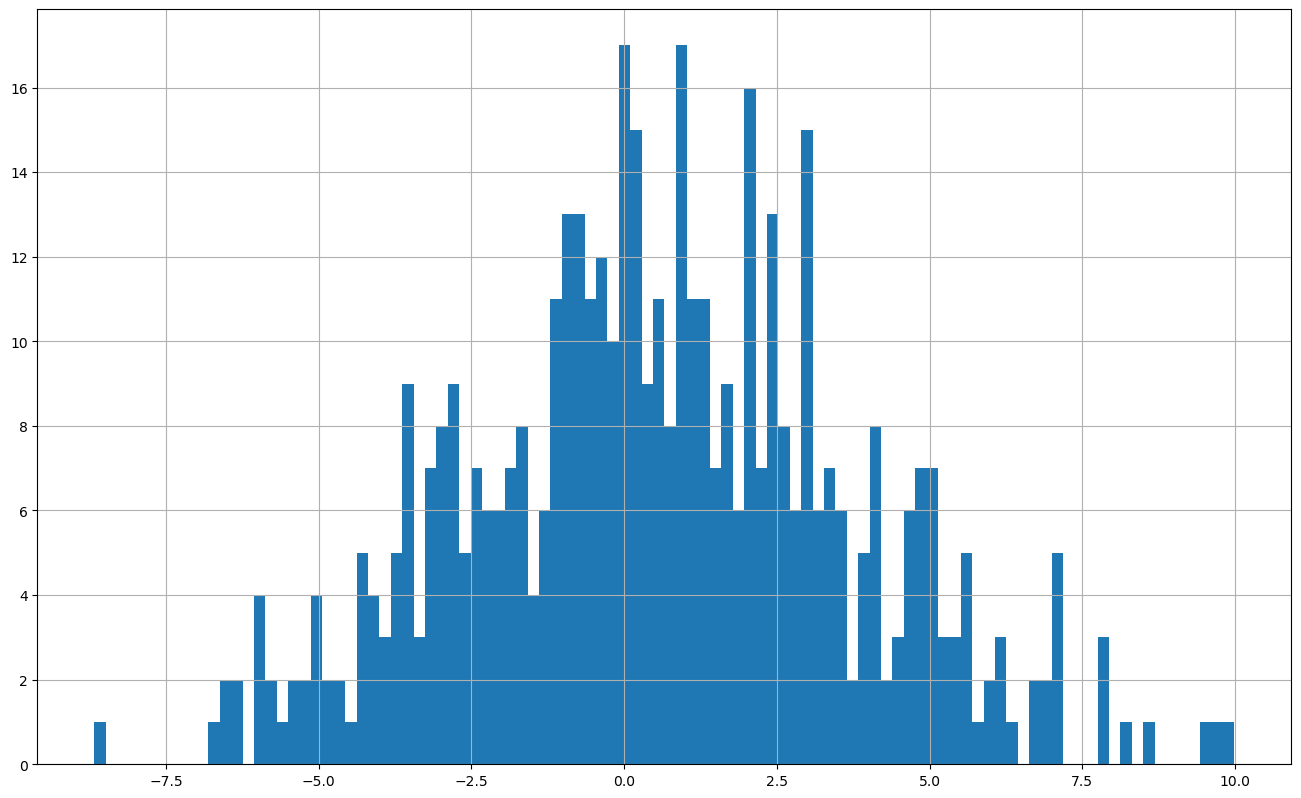

In [51]:
data_selected = data2.query("Res1=='ALA' and Res2=='ALA'").reset_index(drop=True)
data_selected["D_H_minus_P"].hist(bins=100)

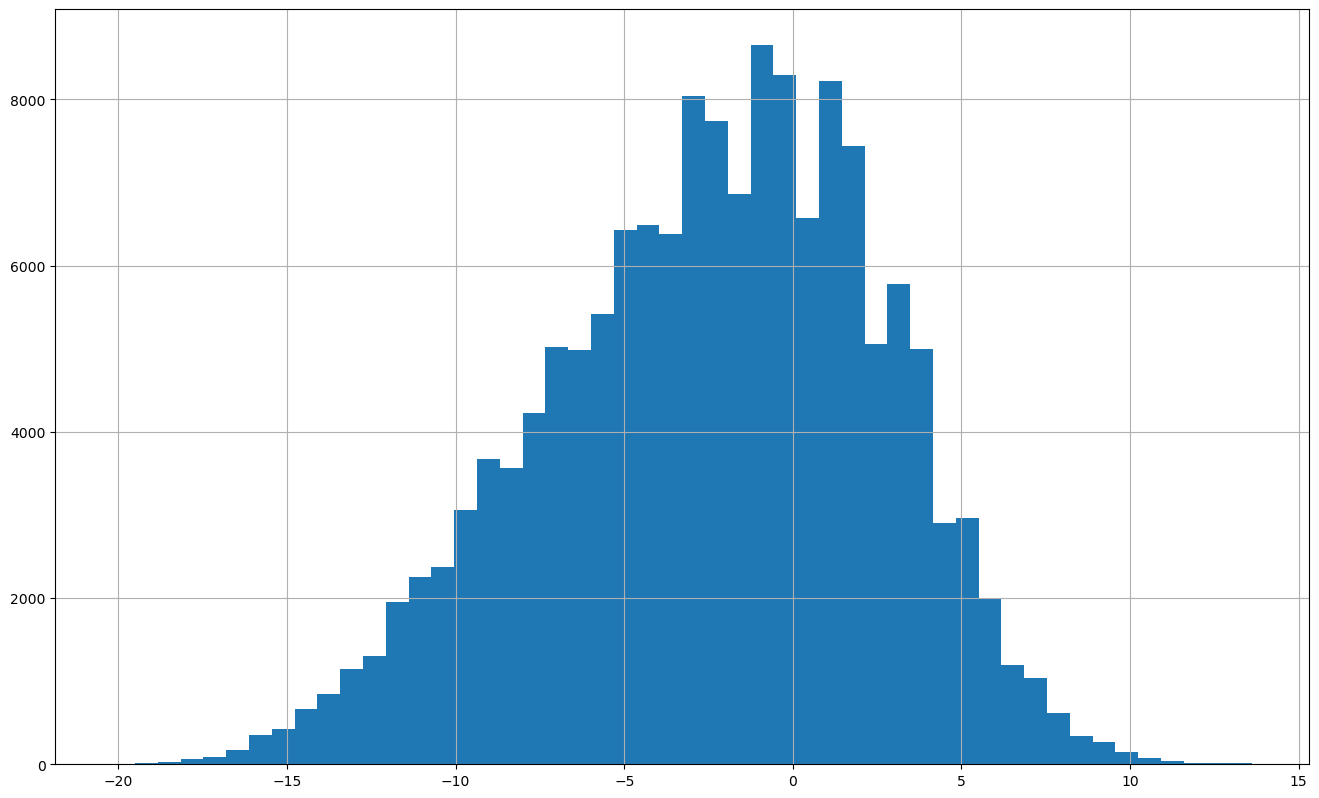

In [46]:
data2["D_H_minus_P"].hist(bins=50)

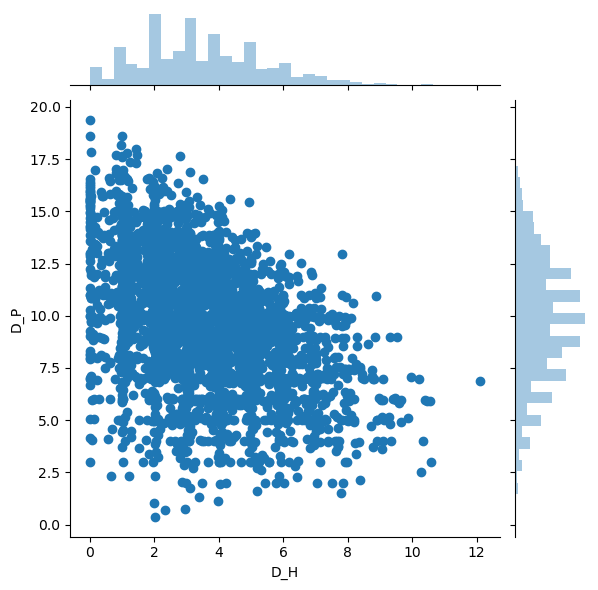

In [43]:
b = data2.query("Res1=='VAL' and Res2=='LEU'").reset_index(drop=True)
sns.jointplot("D_H", "D_P", data=b, kind="scatter")

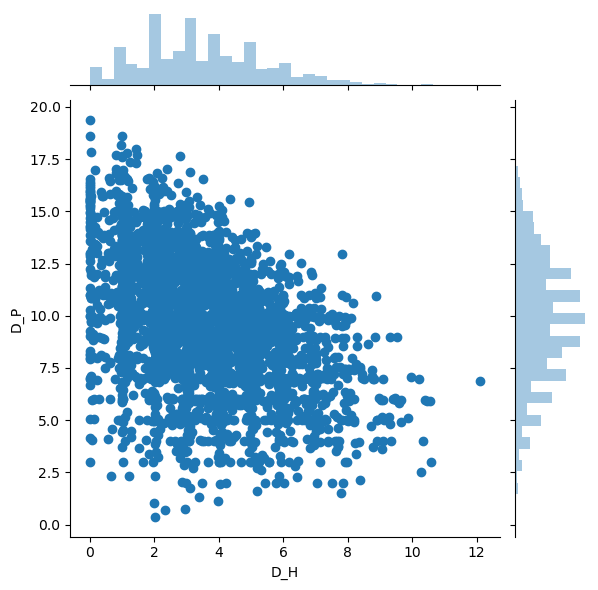

In [49]:
b = data2.query("Res1=='VAL' and Res2=='LEU'").reset_index(drop=True)
sns.jointplot("D_H", "D_P", data=b, kind="scatter")

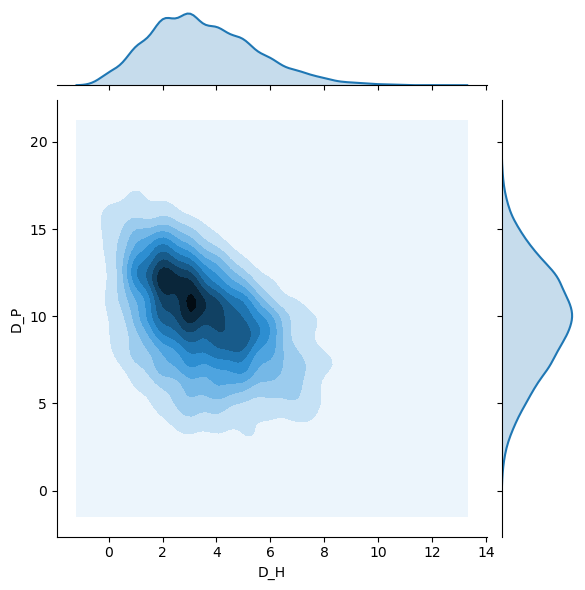

In [5]:
# data2.groupby(["Res1", "Res2"])["Theta"].count().reset_index().sort_values("Theta")
b = data2.query("Res1=='VAL' and Res2=='LEU'").reset_index(drop=True)
b["D_H"] = b["Density_H_x"] + b["Density_H_y"]
b["D_P"] = b["Density_P_x"] + b["Density_P_y"]
sns.jointplot("D_H", "D_P", data=b, kind="kde")

In [6]:
data2.groupby(["Res1", "Res2"])["Theta"].count().reset_index().sort_values("Theta")

,Res1,Res2,Theta
83,CYS,ASP,31
64,ASP,CYS,31
104,GLN,CYS,42
44,ASN,CYS,42
82,CYS,ASN,42
...,...,...,...
390,VAL,LEU,3564
219,LEU,VAL,3564
210,LEU,LEU,4051
190,ILE,LEU,4107


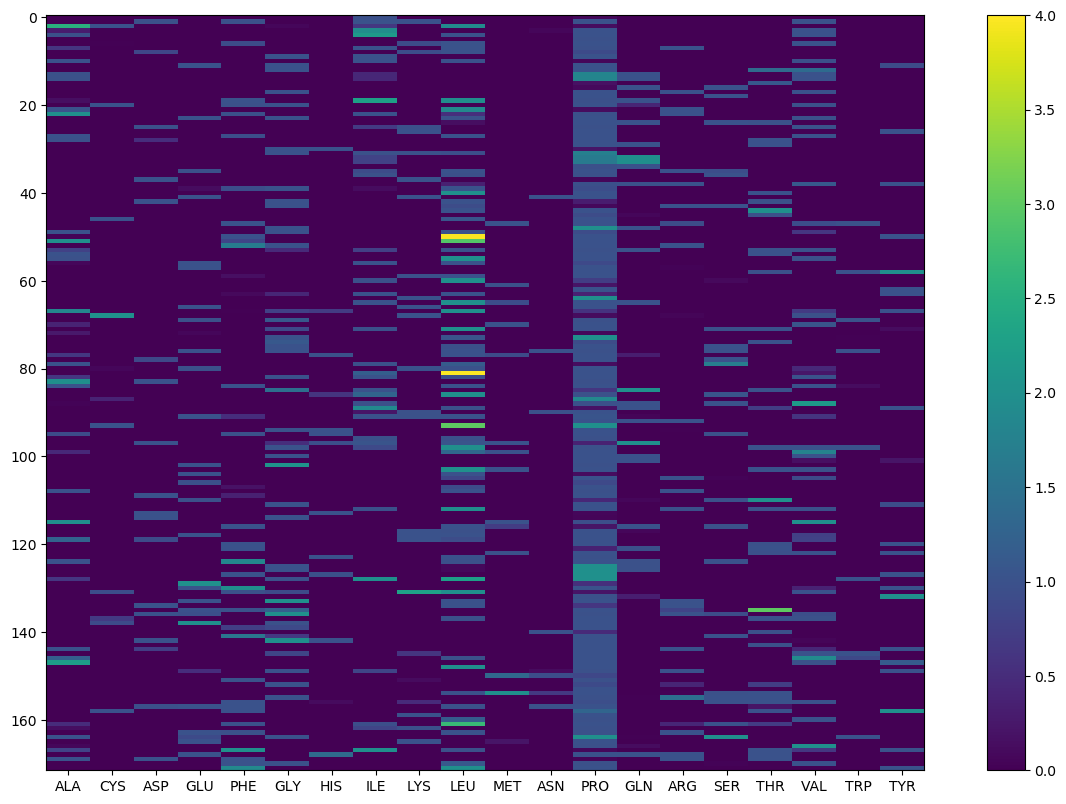

In [82]:
res1 = "THR"
res2 = "PRO"
data_selected = data2.query(f"Res1=='{res1}' and Res2=='{res2}'").reset_index(drop=True)
a= data_selected.iloc[:,10:30].values
plt.imshow(a, aspect=0.1)
plt.colorbar()
_ = plt.xticks(np.arange(20), aa3)

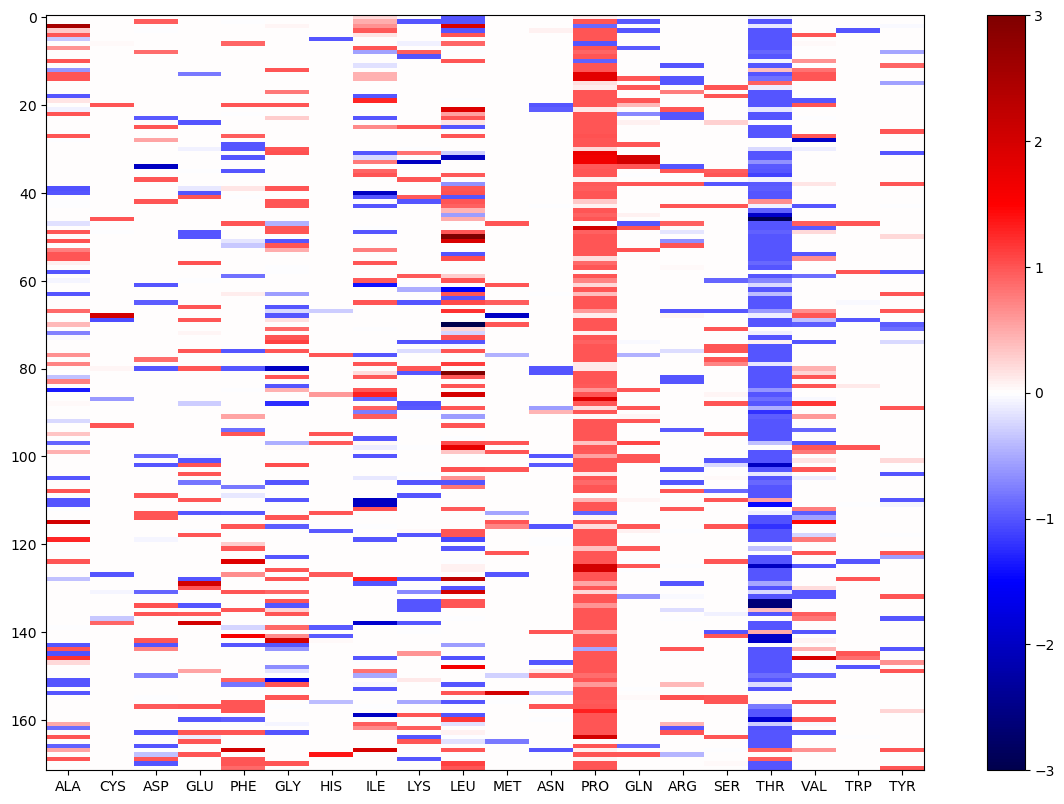

In [88]:
plt.imshow(a-b, aspect=0.1, vmin=-3, vmax=3, cmap="seismic")
plt.colorbar()
_ = plt.xticks(np.arange(20), aa3)

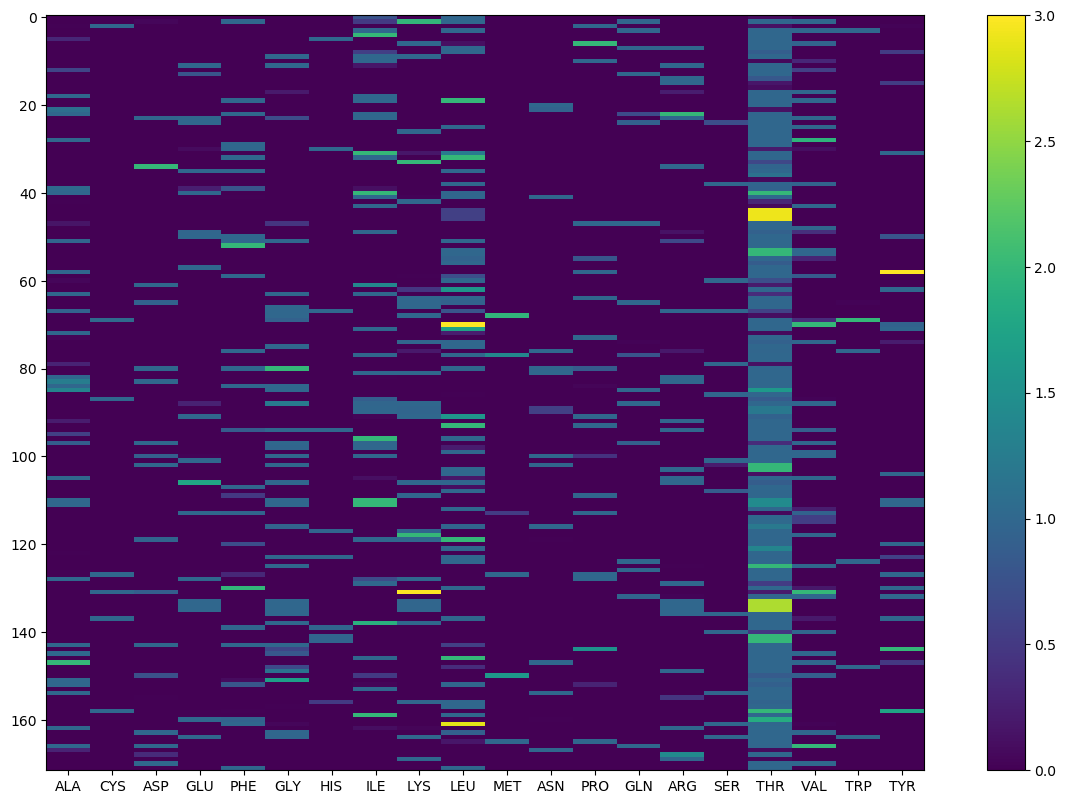

In [81]:
b= data_selected.iloc[:,31:51].values
plt.imshow(b, aspect=0.1)
plt.colorbar()
_ = plt.xticks(np.arange(20), aa3)

In [ ]:
data_selected = data2.query("Res1=='ALA' and Res2=='ALA'").reset_index(drop=True)
a= data_selected.iloc[:,10:30].values
plt.imshow(a, aspect=0.005)
plt.colorbar()
_ = plt.xticks(np.arange(20), aa3)

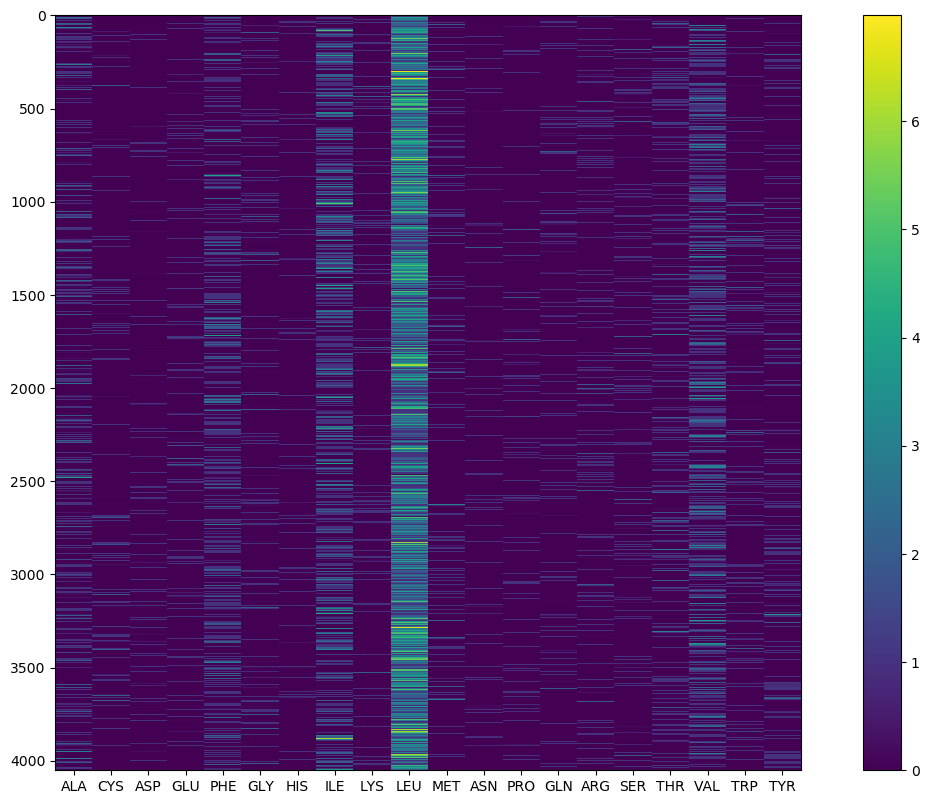

In [90]:
data_selected = data2.query("Res1=='LEU' and Res2=='LEU'").reset_index(drop=True)
a= data_selected.iloc[:,10:30].values
plt.imshow(a, aspect=0.005)
plt.colorbar()
_ = plt.xticks(np.arange(20), aa3)

In [96]:
(data_selected.iloc[:,10:30] > 0.8).sum()

Density_A_x    1180
Density_C_x     307
Density_D_x     231
Density_E_x     411
Density_F_x    1486
Density_G_x     502
Density_H_x     224
Density_I_x    2199
Density_K_x     421
Density_L_x    3984
Density_M_x     536
Density_N_x     193
Density_P_x     398
Density_Q_x     382
Density_R_x     518
Density_S_x     385
Density_T_x     889
Density_V_x    2093
Density_W_x     530
Density_Y_x     834
dtype: int64

In [94]:
data_selected.iloc[:,10:30].sum()

Density_A_x     1530.191
Density_C_x      358.081
Density_D_x      256.338
Density_E_x      463.489
Density_F_x     1939.661
Density_G_x      591.601
Density_H_x      244.131
Density_I_x     3374.892
Density_K_x      467.130
Density_L_x    10731.431
Density_M_x      624.799
Density_N_x      228.558
Density_P_x      446.512
Density_Q_x      433.186
Density_R_x      576.227
Density_S_x      476.053
Density_T_x     1014.205
Density_V_x     2980.562
Density_W_x      603.345
Density_Y_x      946.224
dtype: float64

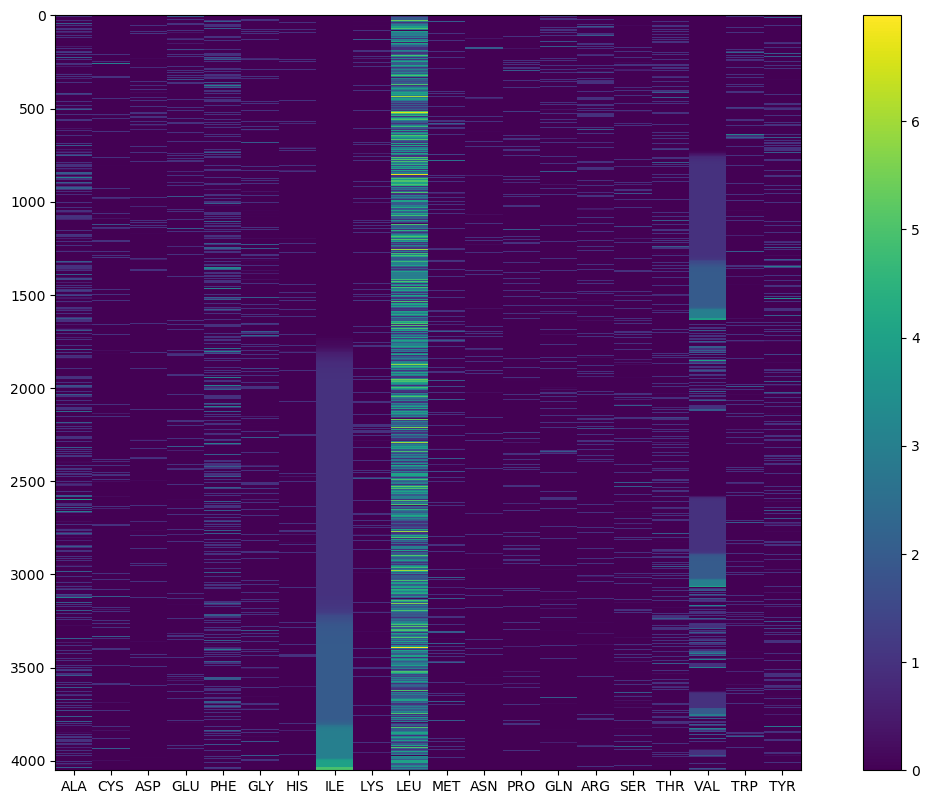

In [95]:
data_selected = data2.query("Res1=='LEU' and Res2=='LEU'").sort_values(["Density_I_x", "Density_V_x"]).reset_index(drop=True)
a= data_selected.iloc[:,10:30].values
plt.imshow(a, aspect=0.005)
plt.colorbar()
_ = plt.xticks(np.arange(20), aa3)

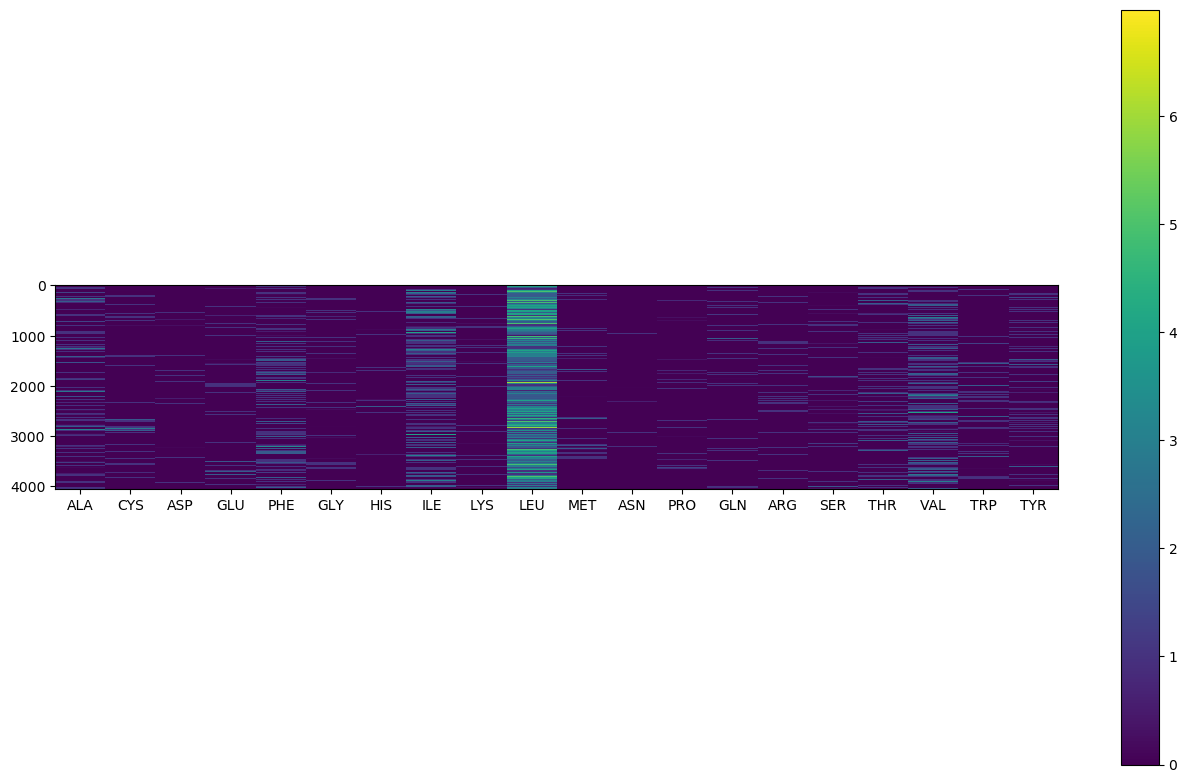

In [75]:
a= data_selected.iloc[:,31:51].values
plt.imshow(a, aspect=0.001)
plt.colorbar()
_ = plt.xticks(np.arange(20), aa3)

In [74]:
data2.iloc[:,31:52]

,Density_A_y,Density_C_y,Density_D_y,Density_E_y,Density_F_y,Density_G_y,Density_H_y,Density_I_y,Density_K_y,Density_L_y,...,Density_N_y,Density_P_y,Density_Q_y,Density_R_y,Density_S_y,Density_T_y,Density_V_y,Density_W_y,Density_Y_y,Protein
0,2.000,0.0,0.000,0.000,0.0,0.000,0.000,2.000,0.0,0.832,...,0.000,0.0,0.0,0.000,0.000,0.995,2.0,0.0,0.000,3b89A01
1,0.000,0.0,0.000,0.000,0.0,0.000,0.000,1.000,0.0,0.000,...,0.000,0.0,0.0,0.032,0.000,0.000,0.0,0.0,0.000,3b89A01
2,0.000,0.0,0.137,0.000,0.0,0.000,0.000,1.000,0.0,1.000,...,1.000,0.0,0.0,0.000,0.000,0.032,0.0,0.0,0.000,3b89A01
3,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.981,1.0,0.000,...,0.000,0.0,0.0,0.000,1.000,1.000,0.0,0.0,0.000,3b89A01
4,0.000,0.0,0.137,0.000,0.0,0.000,0.000,1.000,0.0,1.000,...,1.000,0.0,0.0,0.000,0.000,0.032,0.0,0.0,0.000,3b89A01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150233,0.945,0.0,0.000,1.000,0.0,1.000,0.386,0.000,0.0,0.000,...,0.184,0.0,0.0,1.000,0.037,1.000,0.0,0.0,0.000,2f6sA00
150234,0.000,0.0,0.000,0.147,0.0,1.000,0.000,0.000,0.0,0.000,...,0.000,0.0,0.0,0.059,1.000,0.000,0.0,1.0,2.939,2f6sA00
150235,0.000,0.0,0.000,0.000,0.0,0.996,0.000,0.000,0.0,1.000,...,0.000,0.0,0.0,0.000,0.000,0.000,0.0,0.0,1.080,2f6sA00
150236,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.0,0.999,...,0.000,0.0,0.0,0.924,0.000,0.000,0.0,0.0,1.053,2f6sA00


In [32]:
# data2.groupby(["Res1", "Res2"])["Theta"].count().reset_index().sort_values("Theta")
res1 = "CYS"
res2 = "ASP"
for i in range(20):
    res1 = one_to_three(dindex_to_1[i])
    b = data2.query(f"Res1=='{res1}' and Res2=='{res2}'").reset_index(drop=True)
    sns_plot = sns.jointplot("D_H", "D_P", data=b, kind="kde", xlim=(0,15), ylim=(0,20))
    plt.title(f"{res1}_{res2}")
    sns_plot.savefig(f"/Users/weilu/Research/data/environment_information/{res1}_{res2}.png")
    plt.close()

In [34]:
# data2.groupby(["Res1", "Res2"])["Theta"].count().reset_index().sort_values("Theta")
res1 = "CYS"
res2 = "ASP"
for i in range(20):
    res1 = one_to_three(dindex_to_1[i])
    b = data2.query(f"Res1=='{res1}' and Res2=='{res2}'").reset_index(drop=True)
    sns_plot = sns.jointplot("D_H", "D_P", data=b, kind="kde")
    plt.title(f"{res1}_{res2}")
    sns_plot.savefig(f"/Users/weilu/Research/data/environment_information/{res1}_{res2}_bound.png")
    plt.close()

In [36]:
# data2.groupby(["Res1", "Res2"])["Theta"].count().reset_index().sort_values("Theta")
res1 = "CYS"
res2 = "ASP"
for i in range(20):
    res1 = one_to_three(dindex_to_1[i])
    b = data2.query(f"Res1=='{res1}' and Res2=='{res2}'").reset_index(drop=True)
    sns_plot = sns.jointplot("D_H", "D_P", data=b, kind="scatter")
    plt.title(f"{res1}_{res2}")
    sns_plot.savefig(f"/Users/weilu/Research/data/environment_information/{res1}_{res2}_scatter.png")
    plt.close()

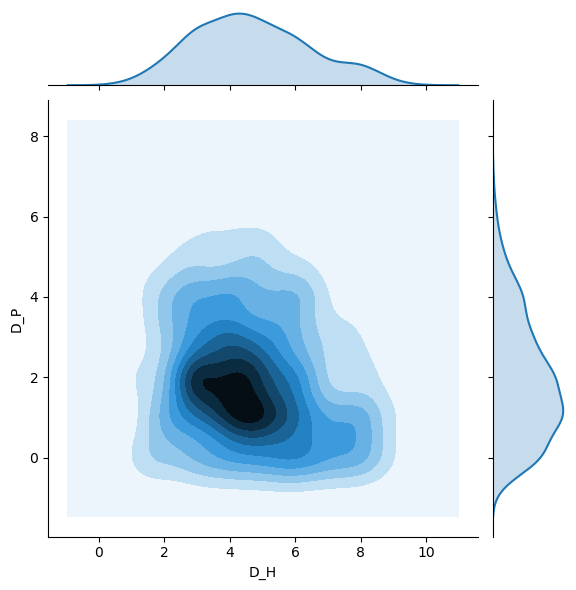

In [37]:
# data2.groupby(["Res1", "Res2"])["Theta"].count().reset_index().sort_values("Theta")
b = data2.query("Res1=='LYS' and Res2=='ASP'").reset_index(drop=True)
sns.jointplot("D_H", "D_P", data=b, kind="kde")

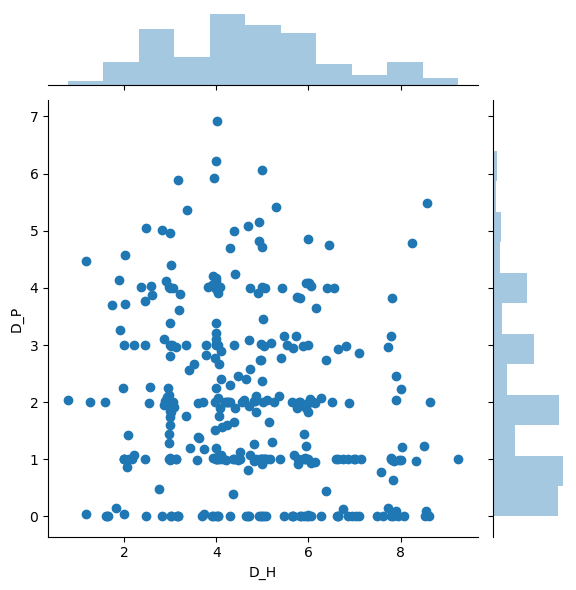

In [35]:
# data2.groupby(["Res1", "Res2"])["Theta"].count().reset_index().sort_values("Theta")
b = data2.query("Res1=='LYS' and Res2=='ASP'").reset_index(drop=True)
sns.jointplot("D_H", "D_P", data=b, kind="scatter")

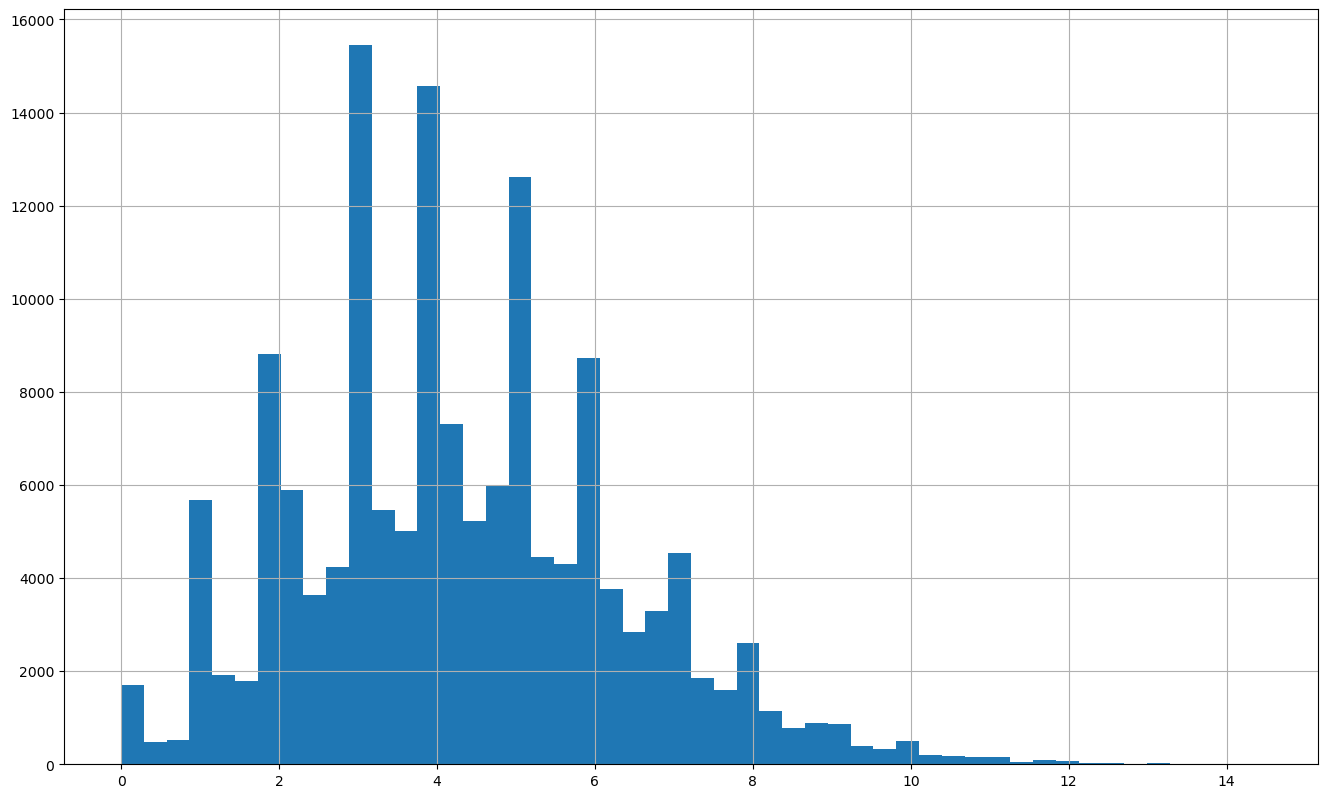

In [33]:
data2["D_H"].hist(bins=50)

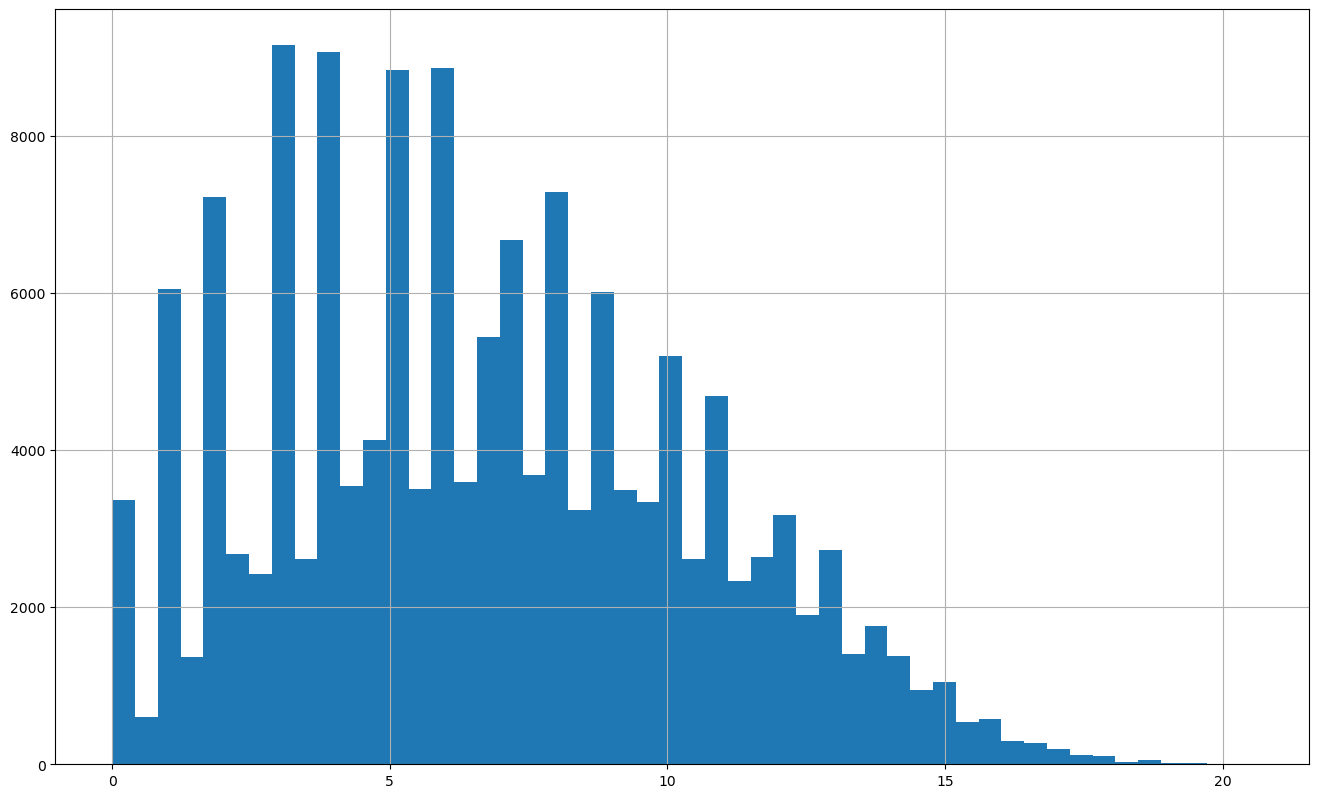

In [30]:
data2["D_P"].hist(bins=50)

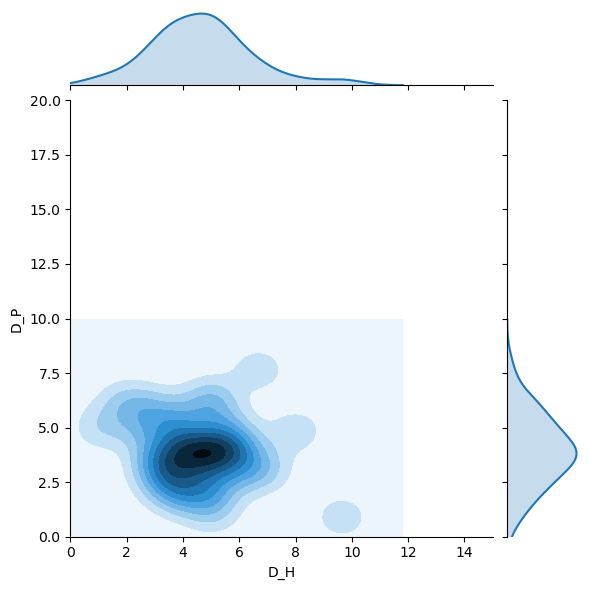

In [31]:
# data2.groupby(["Res1", "Res2"])["Theta"].count().reset_index().sort_values("Theta")
b = data2.query("Res1=='CYS' and Res2=='ASP'").reset_index(drop=True)
sns.jointplot("D_H", "D_P", data=b, kind="kde", xlim=(0,15), ylim=(0,20))

In [12]:
X = data2.query("Res1=='CYS' and Res2=='ASP'")[["D_H", "D_P"]].values

In [4]:
a = pd.read_csv("/Users/weilu/Research/server/mar_2020/environmental_information/all_data_no_round_iterative_native_with_cbd_info.csv", index_col=0)
a["D_H"] = a["Density_H_x"] + a["Density_H_y"]
a["D_P"] = a["Density_P_x"] + a["Density_P_y"]
data_native = a
data_native.groupby(["Res1", "Res2"])["Theta"].count().reset_index().sort_values("Theta")

,Res1,Res2,Theta
83,CYS,ASP,4
64,ASP,CYS,4
124,GLU,CYS,7
85,CYS,GLN,7
86,CYS,GLU,7
...,...,...,...
199,ILE,VAL,370
209,LEU,ILE,424
190,ILE,LEU,424
219,LEU,VAL,490


In [5]:
a = pd.read_csv("/Users/weilu/Research/server/mar_2020/environmental_information/all_data_no_round_iterative_with_cbd_info.csv", index_col=0)
a["D_H"] = a["Density_H_x"] + a["Density_H_y"]
a["D_P"] = a["Density_P_x"] + a["Density_P_y"]
data_iterative = a
data_iterative.groupby(["Res1", "Res2"])["Theta"].count().reset_index().sort_values("Theta")

,Res1,Res2,Theta
84,CYS,CYS,1
242,MET,ASN,5
52,ASN,MET,5
105,GLN,GLN,7
357,TRP,TRP,7
...,...,...,...
209,LEU,ILE,440
389,VAL,ILE,512
199,ILE,VAL,512
219,LEU,VAL,614


In [12]:
a = pd.read_csv("/Users/weilu/Research/server/mar_2020/environmental_information/all_data_no_round_cath.csv", index_col=0)
a["D_H"] = a["Density_H_x"] + a["Density_H_y"]
a["D_P"] = a["Density_P_x"] + a["Density_P_y"]
data_old = a
data_old.groupby(["Res1", "Res2"])["Theta"].count().reset_index().sort_values("Theta")



,Res1,Res2,Theta
357,TRP,TRP,35
168,HIS,HIS,49
44,ASN,CYS,54
82,CYS,ASN,54
64,ASP,CYS,55
...,...,...,...
390,VAL,LEU,3135
219,LEU,VAL,3135
190,ILE,LEU,3583
209,LEU,ILE,3583


,Res1,Res2,Theta
83,CYS,ASP,31
64,ASP,CYS,31
104,GLN,CYS,42
44,ASN,CYS,42
82,CYS,ASN,42
...,...,...,...
390,VAL,LEU,3564
219,LEU,VAL,3564
210,LEU,LEU,4051
190,ILE,LEU,4107


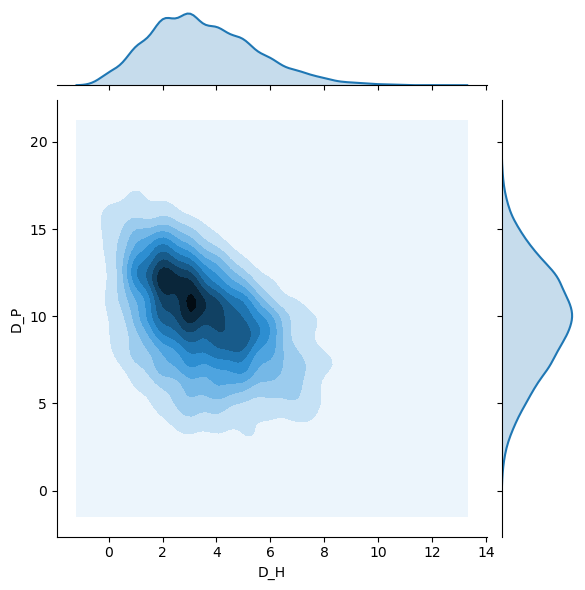

In [9]:
a = pd.read_csv("/Users/weilu/Research/server/mar_2020/environmental_information/all_data_no_round_cath_with_cbd_info.csv", index_col=0)
a["D_H"] = a["Density_H_x"] + a["Density_H_y"]
a["D_P"] = a["Density_P_x"] + a["Density_P_y"]
data2 = a
data2.groupby(["Res1", "Res2"])["Theta"].count().reset_index().sort_values("Theta")
b = data2.query("Res1=='VAL' and Res2=='LEU'").reset_index(drop=True)
b["D_H"] = b["Density_H_x"] + b["Density_H_y"]
b["D_P"] = b["Density_P_x"] + b["Density_P_y"]
sns.jointplot("D_H", "D_P", data=b, kind="kde")

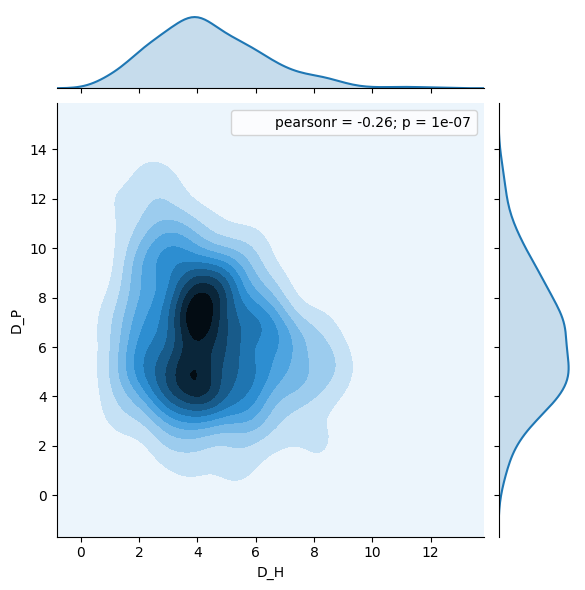

In [28]:
b = data2.query("Res1=='SER' and Res2=='ILE'").reset_index(drop=True)
b["D_H"] = b["Density_H_x"] + b["Density_H_y"]
b["D_P"] = b["Density_P_x"] + b["Density_P_y"]
sns.jointplot("D_H", "D_P", data=b, kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1211ddf60>]],
      dtype=object)

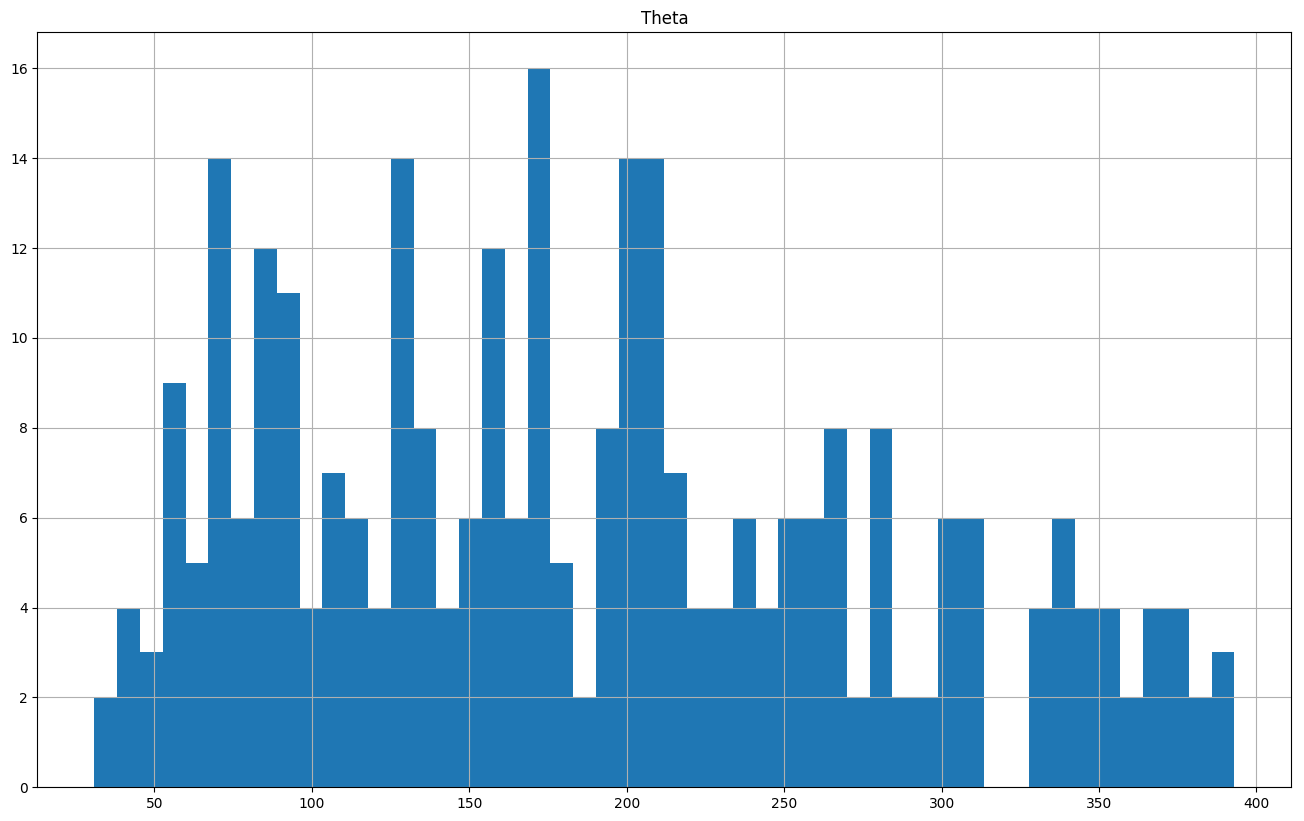

In [33]:
data2.groupby(["Res1", "Res2"])["Theta"].count().reset_index().sort_values("Theta")[:-100].hist("Theta", bins=50)

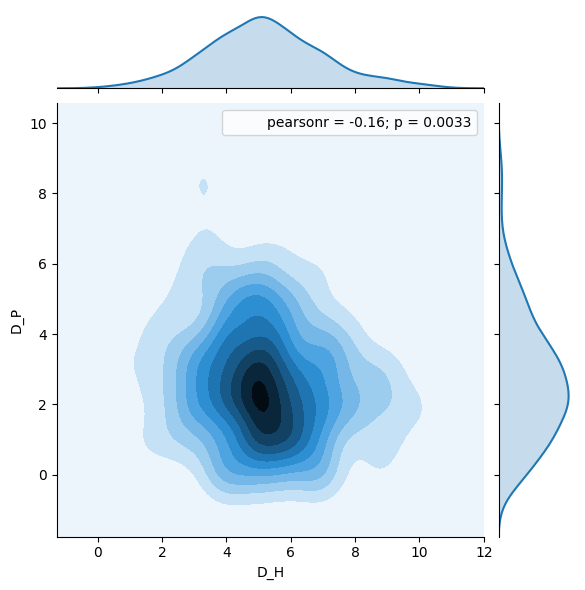

In [16]:
b = data2.query("Res1=='GLU' and Res2=='ALA'").reset_index(drop=True)
b["D_H"] = b["Density_H_x"] + b["Density_H_y"]
b["D_P"] = b["Density_P_x"] + b["Density_P_y"]
sns.jointplot("D_H", "D_P", data=b, kind="kde")

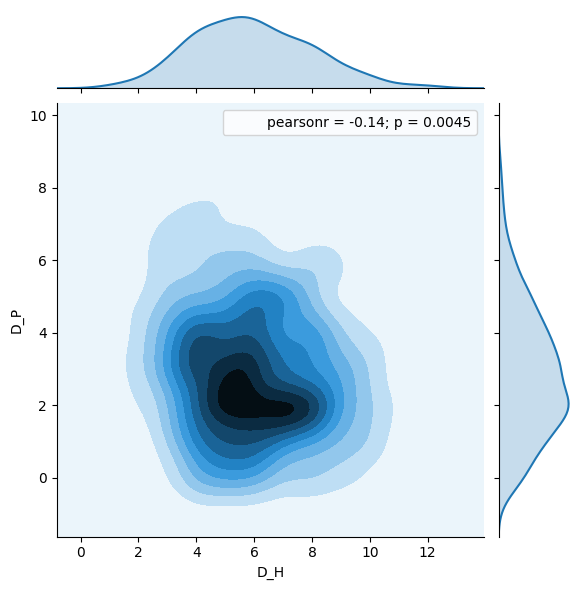

In [14]:
data2 = pd.read_csv("/Users/weilu/Research/server/mar_2020/environmental_information/all_data_no_round_cath.csv", index_col=0)
data2.groupby(["Res1", "Res2"])["Theta"].count().reset_index().sort_values("Theta")
b = data2.query("Res1=='GLU' and Res2=='ALA'").reset_index(drop=True)
b["D_H"] = b["Density_H_x"] + b["Density_H_y"]
b["D_P"] = b["Density_P_x"] + b["Density_P_y"]
sns.jointplot("D_H", "D_P", data=b, kind="kde")

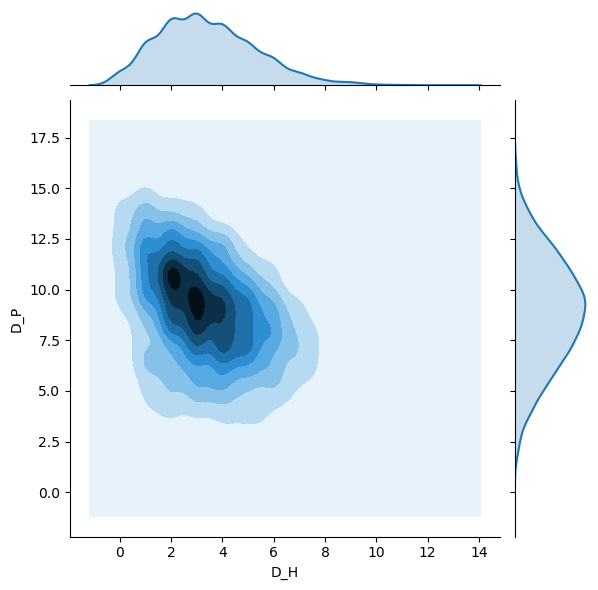

In [28]:
# data2 = pd.read_csv("/Users/weilu/Research/server/mar_2020/environmental_information/all_data_no_round_cath.csv", index_col=0)
# data2.groupby(["Res1", "Res2"])["Theta"].count().reset_index().sort_values("Theta")
a = data_old.query("Res1=='LEU' and Res2=='LEU'").reset_index(drop=True)
sns.jointplot("D_H", "D_P", data=a, kind="kde")

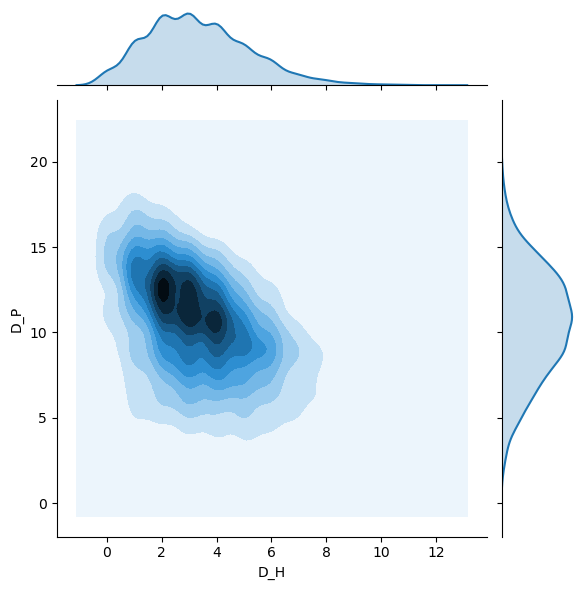

In [25]:
# data2 = pd.read_csv("/Users/weilu/Research/server/mar_2020/environmental_information/all_data_no_round_cath.csv", index_col=0)
# data2.groupby(["Res1", "Res2"])["Theta"].count().reset_index().sort_values("Theta")
a = data2.query("Res1=='LEU' and Res2=='LEU'").reset_index(drop=True)
a["D_H"] = a["Density_H_x"] + a["Density_H_y"]
a["D_P"] = a["Density_P_x"] + a["Density_P_y"]
sns.jointplot("D_H", "D_P", data=a, kind="kde")

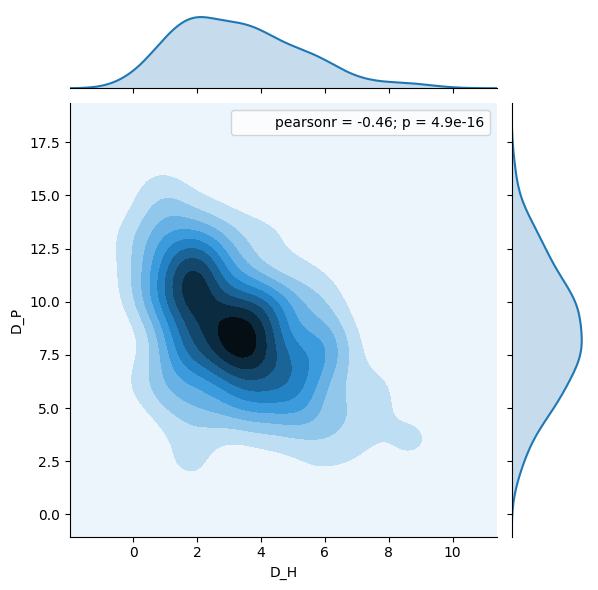

In [30]:
a = data_iterative.query("Res1=='LEU' and Res2=='LEU'").reset_index(drop=True)
a["D_H"] = a["Density_H_x"] + a["Density_H_y"]
a["D_P"] = a["Density_P_x"] + a["Density_P_y"]
sns.jointplot("D_H", "D_P", data=a, kind="kde")

In [30]:
info = pd.read_csv("/Users/weilu/Research/server/mar_2020/environmental_information/info_collection.csv")

In [33]:
info = info.query("Steps==2001")[["Q", "Run", "Protein", "Folder"]].reset_index(drop=True)

In [34]:
info.query("Folder")

,Q,Run,Protein,Folder
0,0.36,0,1hoe,iteration_3
1,0.42,1,1hoe,iteration_3
2,0.43,0,1tif,iteration_3
3,0.45,1,1tif,iteration_3
4,0.80,0,1vcc,iteration_3
...,...,...,...,...
149,0.47,1,2hbg,iteration_3
150,0.81,0,1akr,iteration_3
151,0.76,1,1akr,iteration_3
152,0.51,0,1osa,iteration_3


In [38]:
data_iterative = data_iterative.merge(info, on=["Protein", "Run"])

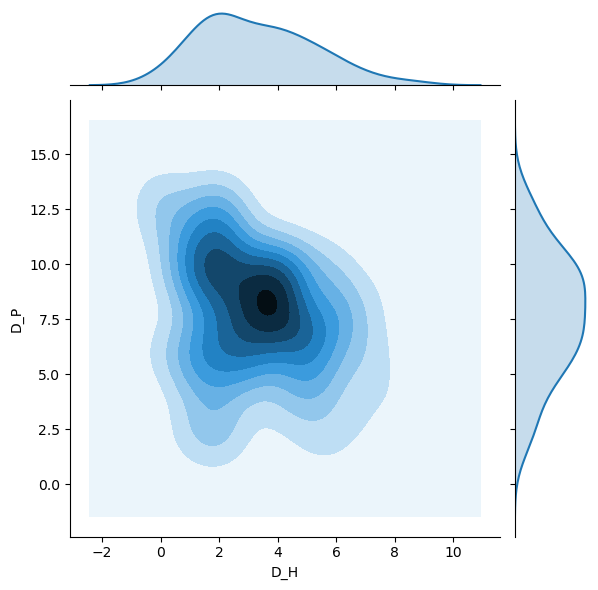

In [43]:
a = data_iterative.query("Res1=='LEU' and Res2=='LEU' and Q < 0.5").reset_index(drop=True)
sns.jointplot("D_H", "D_P", data=a, kind="kde")

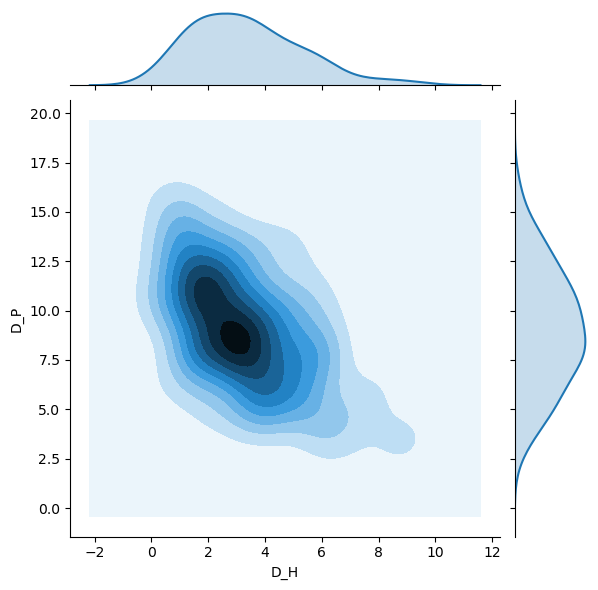

In [44]:
a = data_iterative.query("Res1=='LEU' and Res2=='LEU' and Q > 0.5").reset_index(drop=True)
sns.jointplot("D_H", "D_P", data=a, kind="kde")

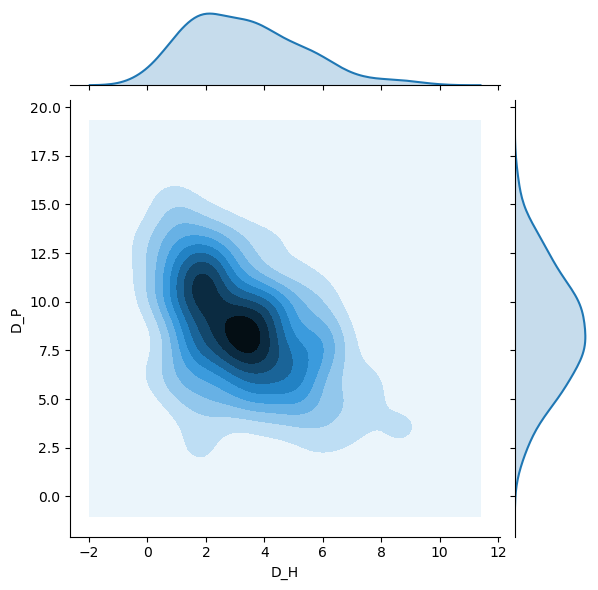

In [42]:
a = data_iterative.query("Res1=='LEU' and Res2=='LEU'").reset_index(drop=True)
sns.jointplot("D_H", "D_P", data=a, kind="kde")

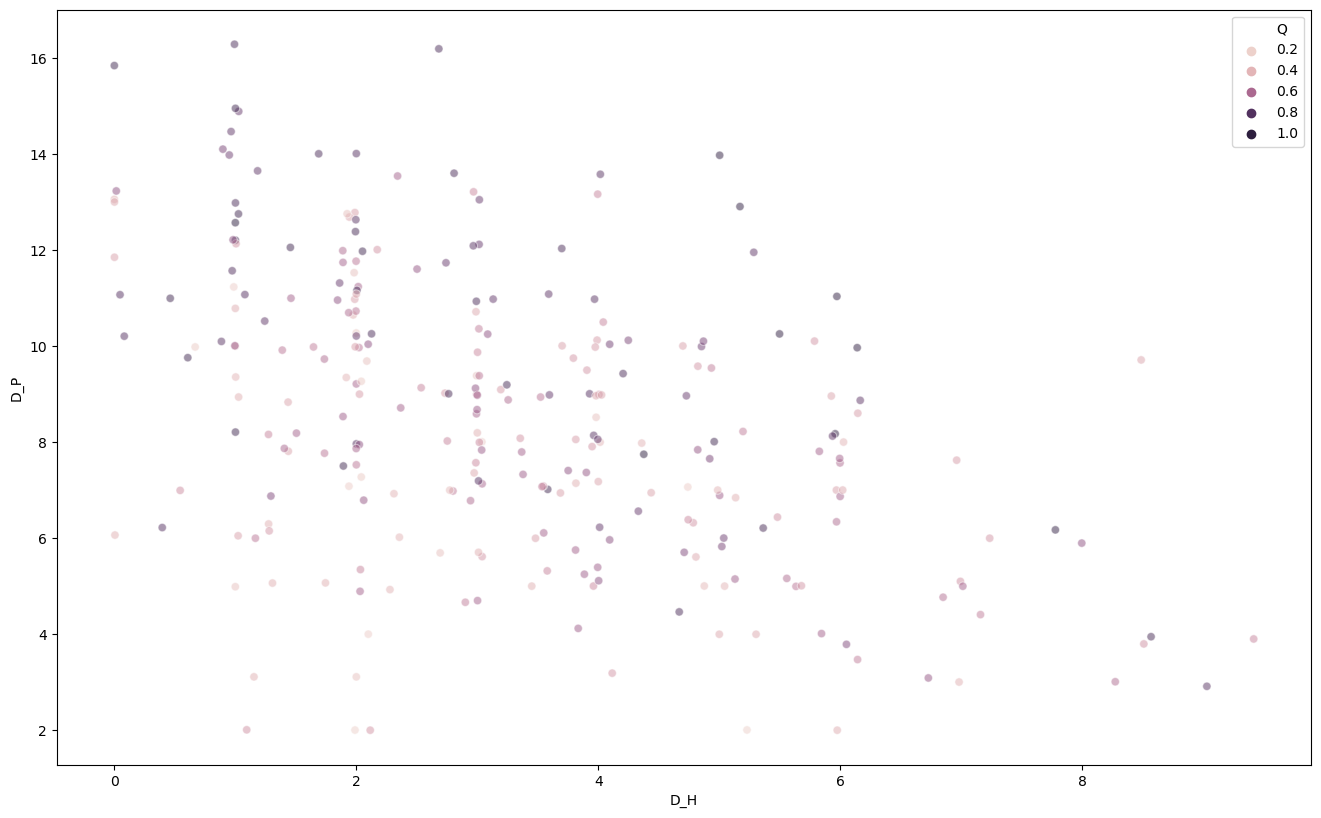

In [40]:
sns.scatterplot("D_H", "D_P", hue="Q", data=data_iterative.query("Res1=='LEU' and Res2=='LEU'"), alpha=0.5)

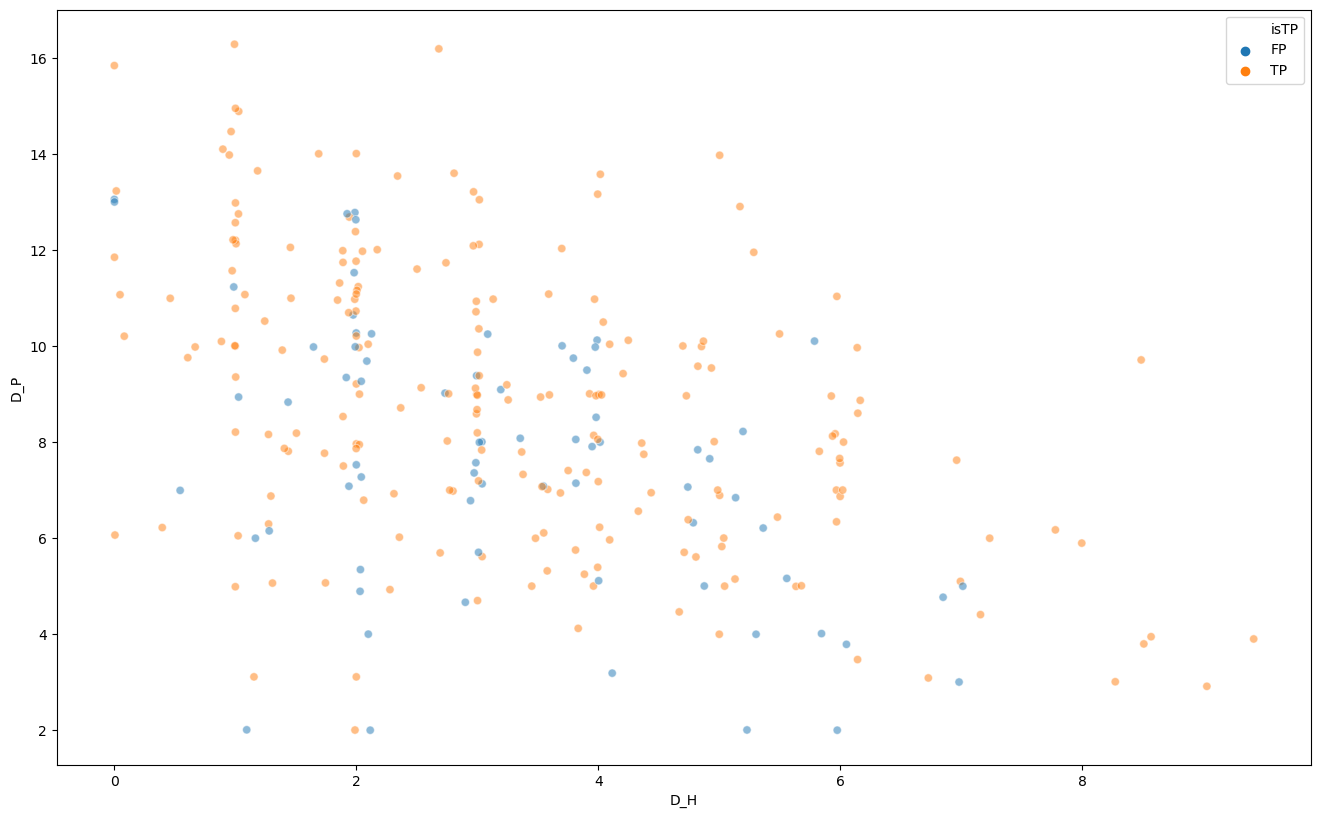

In [153]:
sns.scatterplot("D_H", "D_P", hue="isTP", data=new_d, alpha=0.5)

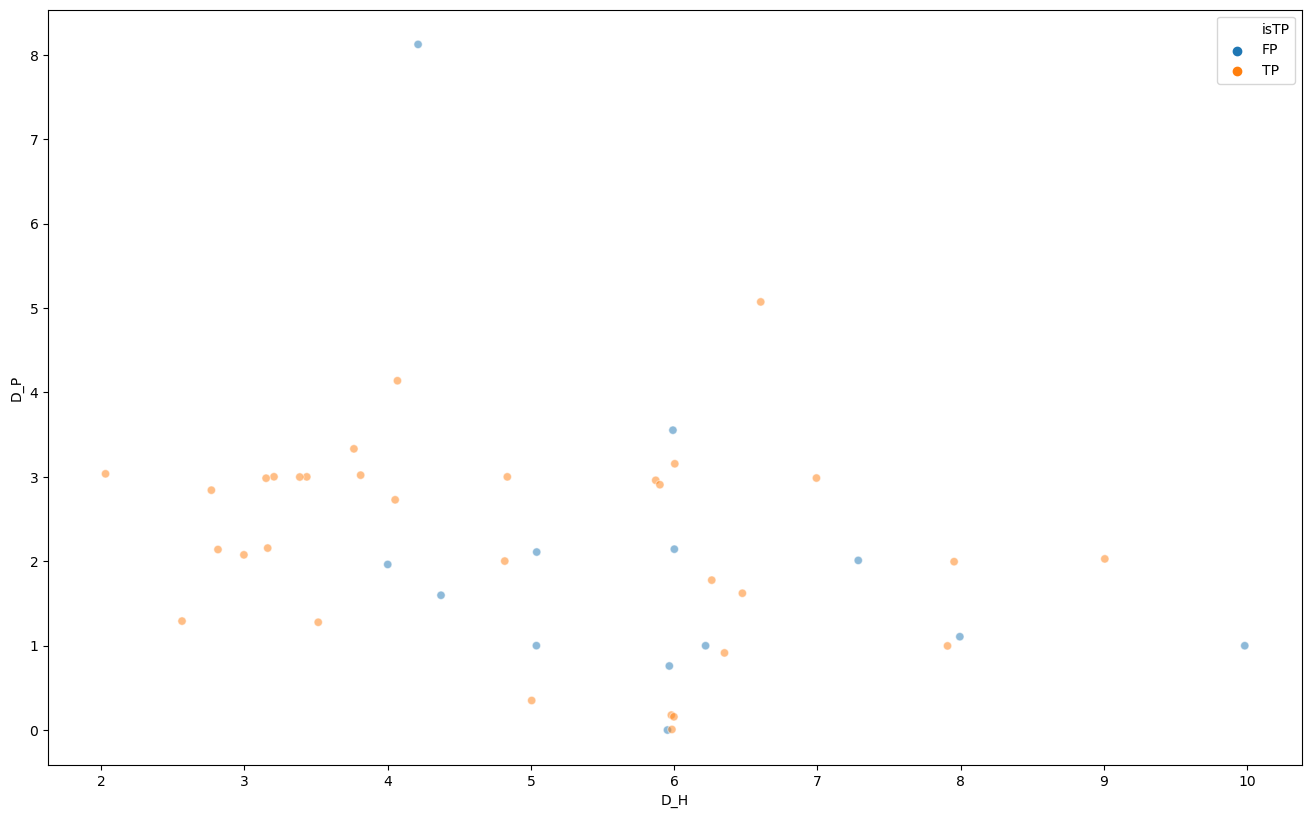

In [10]:
sns.scatterplot("D_H", "D_P", hue="isTP", data=new_d, alpha=0.5)

In [101]:
pre = "/Users/weilu/Research/server/mar_2020/environmental_information/"
pdb = "1akr"
ii = 1
data = pd.read_csv(f"{pre}/iterative/{pdb}_{ii}.csv", index_col=0)
data_envr = pd.read_csv(f"{pre}/iterative/{pdb}_{ii}_environment.csv", index_col=0)

# data_envr["Density_H"] = data_envr["Density_H"].round()
# data_envr["Density_P"] = data_envr["Density_P"].round()

data_with_info = data.merge(data_envr, how='left', left_on="Index1", right_on="index").merge(data_envr, how='left', left_on="Index2", right_on="index")
data_ = data_with_info.query("Theta > 5e-2 and Type == 'Direct'").reset_index(drop=True)
# data_ = data_with_info

In [102]:
data_.query(f"Res1=='{res1}' and Res2=='{res2}'")

,Res1,Res2,Type,Theta,Index1,Index2,r,ResId1,ResId2,index_x,Density_H_x,Density_P_x,index_y,Density_H_y,Density_P_y
16,LEU,LEU,Direct,0.475,3,44,6.877109,4,45,3,2.000,4.751,44,2.011,1.475
83,LEU,LEU,Direct,1.000,24,52,6.056805,25,53,24,1.131,5.574,52,2.000,5.403
86,LEU,LEU,Direct,0.409,24,50,6.903615,25,51,24,1.131,5.574,50,2.465,3.409
151,LEU,LEU,Direct,0.207,53,76,7.001105,54,77,53,0.000,6.172,76,2.000,4.037
205,LEU,LEU,Direct,1.000,76,110,5.694576,77,111,76,2.000,4.037,110,1.996,4.020


In [128]:
# true positive
pdb = "1akr"
res1 = "LEU"
res2 = "LEU"
run = 0
a = data_native.query(f"Protein=='{pdb}'and Res1=='{res1}' and Res2=='{res2}'").reset_index(drop=True)
b = data_iterative.query(f"Protein=='{pdb}' and Run=='{run}' and Res1=='{res1}' and Res2=='{res2}'").reset_index(drop=True)

In [119]:
contacts = set(b["Index1"].astype(str) + "_" + b["Index2"].astype(str))

In [120]:
contacts

{'24_50', '24_52', '3_52', '44_72', '76_110'}

In [6]:
def isTP(contact, native_contacts):
    if contact in native_contacts:
        return "TP"
    if contact not in native_contacts:
        return "FP"


res1 = "THR"
res2 = "PRO"
run = 0
pdb = "1akr"
pdb_list = data_iterative["Protein"].unique()
new_d = []
for run in range(2):
    for pdb in pdb_list:
        a = data_native.query(f"Protein=='{pdb}'and Res1=='{res1}' and Res2=='{res2}'").reset_index(drop=True)
        b = data_iterative.query(f"Protein=='{pdb}' and Run=='{run}' and Res1=='{res1}' and Res2=='{res2}'").reset_index(drop=True)
        native_contacts = set(a["Index1"].astype(str) + "_" + a["Index2"].astype(str))
        b["Contact"] = b["Index1"].astype(str) + "_" + b["Index2"].astype(str)
        b["isTP"] = b["Contact"].apply(isTP, native_contacts=native_contacts)
        new_d.append(b)
new_d = pd.concat(new_d).reset_index(drop=True)


In [7]:
new_d

,Res1,Res2,Type,Theta,Index1,Index2,r,ResId1,ResId2,index_x,...,Density_P_x,index_y,Density_H_y,Density_P_y,Protein,Run,D_H,D_P,Contact,isTP
0,THR,PRO,Direct,1.000,28,2,4.986226,29,3,28,...,0.000,2,1.038,1.000,1by9,0,5.038,1.000,28_2,FP
1,THR,PRO,Direct,0.994,65,81,6.079741,66,82,65,...,2.000,81,0.994,1.000,1fna,0,3.435,3.000,65_81,TP
2,THR,PRO,Direct,0.908,88,58,6.357295,89,59,88,...,1.010,58,0.908,1.129,1fna,0,2.815,2.139,88_58,TP
3,THR,PRO,Direct,0.693,58,75,6.504425,59,76,58,...,1.998,75,1.693,1.000,1bm8,0,3.386,2.998,58_75,TP
4,THR,PRO,Direct,1.000,64,51,5.319895,65,52,64,...,2.000,51,1.246,1.001,3vub,0,3.206,3.001,64_51,TP
5,THR,PRO,Direct,1.000,47,19,5.083985,48,20,47,...,0.000,19,2.000,0.177,1kte,0,5.980,0.177,47_19,TP
6,THR,PRO,Direct,1.000,95,77,5.553338,96,78,95,...,1.028,77,4.153,1.000,1bkf,0,9.006,2.028,95_77,TP
7,THR,PRO,Direct,1.000,19,93,4.892044,20,94,19,...,1.050,93,2.000,0.912,1sfp,0,4.000,1.962,19_93,FP
8,THR,PRO,Direct,1.000,30,62,5.411886,31,63,30,...,2.020,62,1.001,1.000,1sfp,0,3.811,3.020,30_62,TP
9,THR,PRO,Direct,1.000,22,1,5.513818,23,2,22,...,0.598,1,1.022,0.999,2mcm,0,4.372,1.597,22_1,FP


In [125]:
native_contacts

{'24_50',
 '24_52',
 '3_44',
 '44_72',
 '53_110',
 '53_72',
 '53_76',
 '76_110',
 '76_113'}

In [8]:
gammaFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_optimization/optimization_iter3/saved_gammas/iter3_z_weighted_2_cutoff400_impose_Aprime_constraint"
gamma_info = get_contact_gamma_info(gammaFile)

In [9]:
gamma_info.query("Interaction=='Direct'").sort_values("Gamma")

,Interaction,Res1,Res2,Index,Gamma
372,Direct,Y,P,193,-1.124
371,Direct,P,Y,193,-1.124
379,Direct,W,S,197,-1.121
378,Direct,S,W,197,-1.121
214,Direct,K,E,110,-1.080
...,...,...,...,...,...
351,Direct,F,F,182,1.058
243,Direct,F,G,125,1.091
242,Direct,G,F,125,1.091
277,Direct,H,V,143,1.524


In [11]:
gamma_info.query("Interaction=='Direct' and Res1=='L'")

,Interaction,Res1,Res2,Index,Gamma
20,Direct,L,A,10,-0.388
57,Direct,L,R,29,0.280
92,Direct,L,N,47,0.045
125,Direct,L,D,64,0.576
156,Direct,L,C,80,0.056
185,Direct,L,Q,95,-0.039
212,Direct,L,E,109,-0.480
237,Direct,L,G,122,-0.340
260,Direct,L,H,134,-0.417
281,Direct,L,I,145,-0.322


In [2]:
def get_contact_gamma_info(gammaFile):
    # check the gamma.
    # read in gamma, and sort by size.
    # gammaFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_optimization/optimization_new_4_withoutBurial/saved_gammas/new_4_cutoff600_impose_Aprime_constraint"
    gamma = np.loadtxt(gammaFile)

    res_type_map_letters = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G',
                            'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

    inverse_res_type_map = dict(list(zip(list(range(20)), res_type_map_letters)))
    c = 0
    info_ = []
    for i in range(20):
        for j in range(i, 20):
            info_.append(["Direct", res_type_map_letters[i], res_type_map_letters[j], c, round(gamma[c],3)])
            if i != j:
                info_.append(["Direct", res_type_map_letters[j], res_type_map_letters[i], c, round(gamma[c],3)])
            c += 1
    for i in range(20):
        for j in range(i, 20):
            info_.append(["Protein", res_type_map_letters[i], res_type_map_letters[j], c, round(gamma[c],3)])
            if i != j:
                info_.append(["Protein", res_type_map_letters[j], res_type_map_letters[i], c, round(gamma[c],3)])
            info_.append(["Water", res_type_map_letters[i], res_type_map_letters[j], c+210, round(gamma[c+210],3)])
            if i != j:
                info_.append(["Water", res_type_map_letters[j], res_type_map_letters[i], c+210, round(gamma[c+210],3)])
            c += 1
    contact_gammas = pd.DataFrame(info_, columns=["Interaction", "Res1", "Res2", "Index", "Gamma"])
    return contact_gammas

In [59]:
data_native

,Res1,Res2,Type,Theta,Index1,Index2,r,ResId1,ResId2,index_x,Density_H_x,Density_P_x,index_y,Density_H_y,Density_P_y,Protein,D_H,D_P
0,ASP,ASP,Direct,0.615,0,39,6.387458,1,40,0,2.615,0.000,39,2.612,0.001,1hoe,5.227,0.001
1,THR,ASP,Direct,1.000,1,39,3.803764,2,40,1,1.026,1.000,39,2.612,0.001,1hoe,3.638,1.001
2,ARG,ASP,Direct,0.997,67,39,5.408635,68,40,67,3.023,1.000,39,2.612,0.001,1hoe,5.635,1.001
3,ASP,ARG,Direct,1.000,0,67,4.196109,1,68,0,2.615,0.000,67,3.023,1.000,1hoe,5.638,1.000
4,VAL,ARG,Direct,1.000,35,67,5.400923,36,68,35,4.864,1.000,67,3.023,1.000,1hoe,7.887,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20225,LEU,PHE,Direct,0.111,111,91,7.342279,112,92,111,0.000,2.111,91,0.986,4.953,1osa,0.986,7.064
20226,GLU,ASP,Direct,1.000,103,92,5.176369,104,93,103,3.997,1.000,92,5.000,2.004,1osa,8.997,3.004
20227,GLU,ARG,Direct,0.874,103,93,6.003034,104,94,103,3.997,1.000,93,1.874,0.076,1osa,5.871,1.076
20228,HIS,ARG,Direct,1.000,106,93,4.551530,107,94,106,2.970,0.000,93,1.874,0.076,1osa,4.844,0.076


In [54]:
data_native.query(f"Res1=='{res1}' and Res2=='{res2}'")

,Res1,Res2,Type,Theta,Index1,Index2,r,ResId1,ResId2,index_x,Density_H_x,Density_P_x,index_y,Density_H_y,Density_P_y,Protein,D_H,D_P
16,LEU,LEU,Direct,1.0,13,69,4.486654,14,70,13,2.793,2.000,69,1.999,5.000,1hoe,4.792,7.000
212,LEU,LEU,Direct,1.0,15,42,6.106652,16,43,15,2.019,5.527,42,2.988,5.999,1tif,5.007,11.526
214,LEU,LEU,Direct,1.0,32,42,5.137943,33,43,32,3.892,1.886,42,2.988,5.999,1tif,6.880,7.885
366,LEU,LEU,Direct,1.0,10,30,5.106055,11,31,10,2.003,5.997,30,1.932,5.996,1vcc,3.935,11.993
492,LEU,LEU,Direct,1.0,6,50,5.629869,7,51,6,0.000,9.000,50,0.000,8.000,1by9,0.000,17.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19877,LEU,LEU,Direct,1.0,53,110,5.940358,54,111,53,0.000,9.958,110,1.999,7.008,1akr,1.999,16.966
19878,LEU,LEU,Direct,1.0,76,110,5.347788,77,111,76,2.279,6.739,110,1.999,7.008,1akr,4.278,13.747
20052,LEU,LEU,Direct,1.0,76,113,5.790491,77,114,76,2.279,6.739,113,2.935,1.959,1akr,5.214,8.698
20083,LEU,LEU,Direct,1.0,3,68,5.984374,4,69,3,1.000,3.000,68,0.998,3.996,1osa,1.998,6.996


In [24]:
data_native.query("Res1=='LEU' and Res2=='LEU' and D_H > 9")

,Res1,Res2,Type,Theta,Index1,Index2,r,ResId1,ResId2,index_x,Density_H_x,Density_P_x,index_y,Density_H_y,Density_P_y,Protein,D_H,D_P
7390,LEU,LEU,Direct,0.999,4,44,6.195842,5,45,4,5.270,3.561,44,4.985,0.999,1tmy,10.255,4.560
11901,LEU,LEU,Direct,1.000,6,63,5.423016,7,64,6,5.892,1.000,63,4.004,1.000,1cpq,9.896,2.000
14426,LEU,LEU,Direct,0.998,10,116,6.235893,11,117,10,3.262,3.131,116,5.969,1.133,2end,9.231,4.264


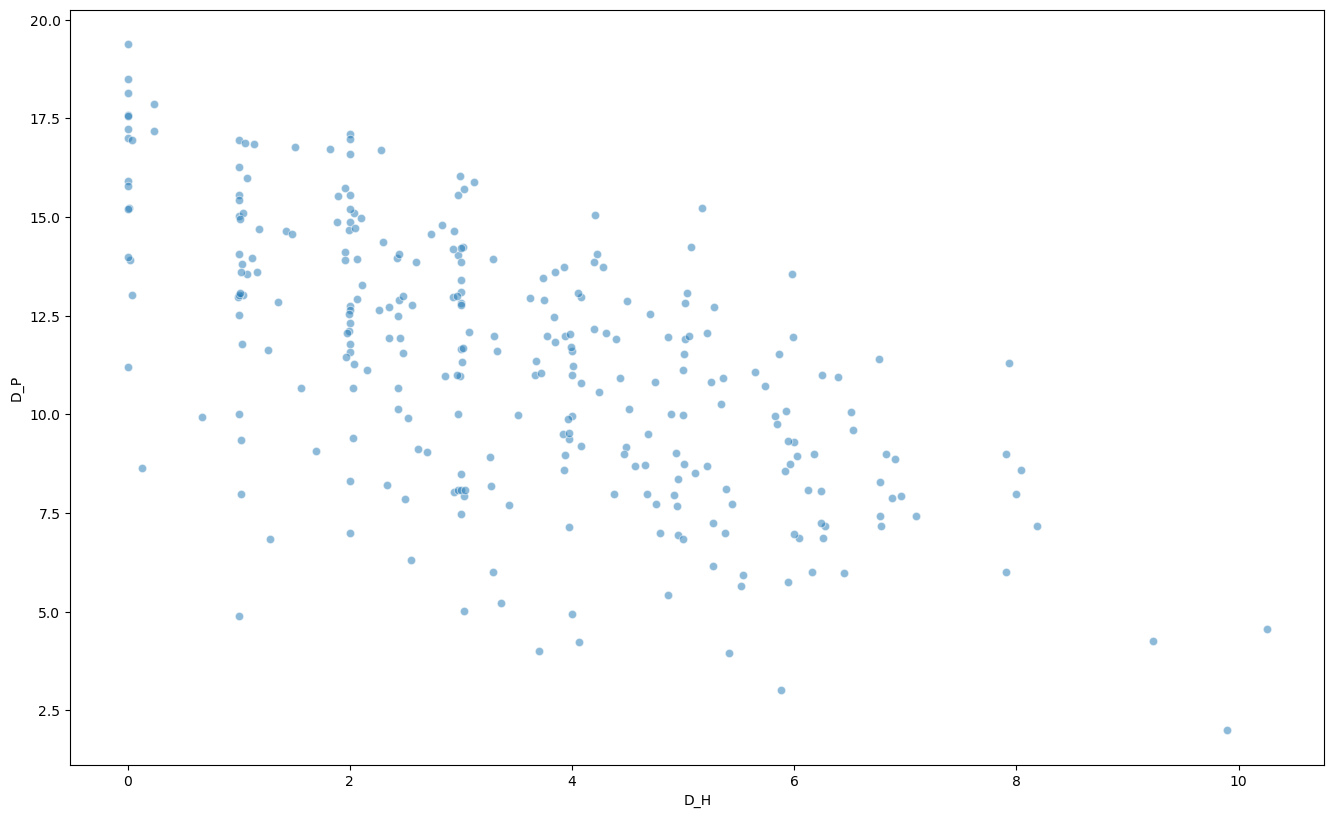

In [23]:
sns.scatterplot("D_H", "D_P", data=data_native.query("Res1=='LEU' and Res2=='LEU'"), alpha=0.5)

No handles with labels found to put in legend.


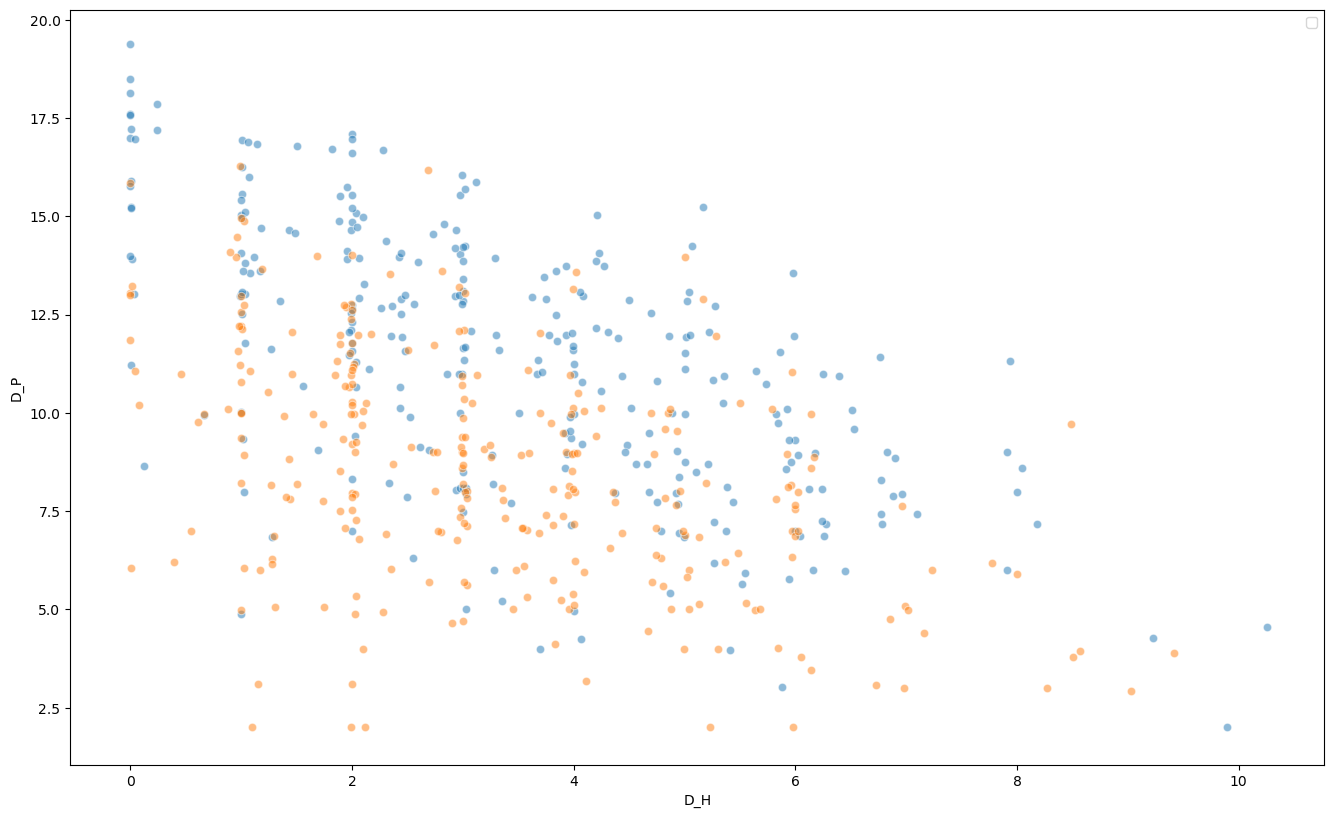

In [22]:
sns.scatterplot("D_H", "D_P", data=data_native.query("Res1=='LEU' and Res2=='LEU'"), alpha=0.5)
sns.scatterplot("D_H", "D_P", data=data_iterative.query("Res1=='LEU' and Res2=='LEU'"), alpha=0.5)

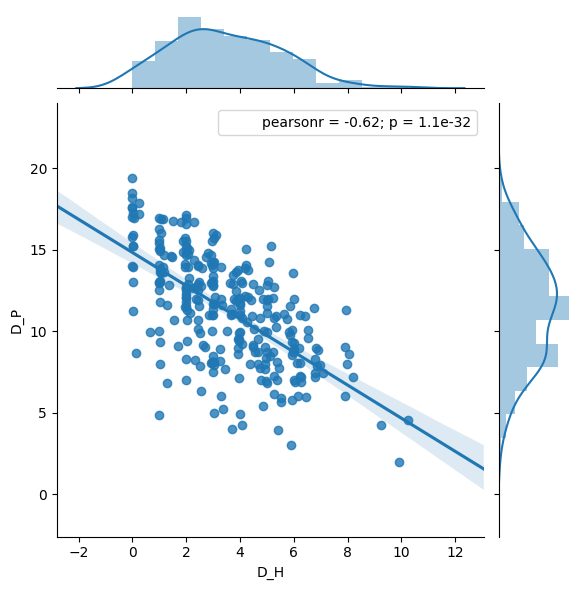

In [39]:
a = data_native.query("Res1=='LEU' and Res2=='LEU'").reset_index(drop=True)
a["D_H"] = a["Density_H_x"] + a["Density_H_y"]
a["D_P"] = a["Density_P_x"] + a["Density_P_y"]
sns.jointplot("D_H", "D_P", data=a, kind="reg")

In [20]:

cbd_info = pd.read_csv("/Users/weilu/opt/parameters/side_chain/cbd_cbd_real_contact_symmetric.csv")

In [22]:
cbd_info.query("ResName1 == 'SER'")

,ResName1,ResName2,r_max,r_min
19,SER,SER,4.359305,3.198264
20,SER,PRO,4.323022,3.109163
21,SER,VAL,4.271867,3.411367
22,SER,THR,4.547018,3.236274
23,SER,CYS,4.243967,3.176515
24,SER,ILE,4.792703,2.905342
25,SER,LEU,4.725601,3.041130
26,SER,ASN,4.646894,3.344635
27,SER,ASP,3.718539,3.013373
28,SER,GLN,4.553369,3.024015


In [ ]:
def get_r_min_max(a, res1, res2, type="Direct"):
    res1_name = res1.get_resname()
    res2_name = res2.get_resname()
    if type == "Direct":
        if res1_name == "GLY" or res2_name == "GLY":
            r_min_res1_res2 = 2.5
            r_max_res1_res2 = 6.5
        else:
            b = a.query(f"ResName1=='{res1_name}' and ResName2=='{res2_name}'")
            if len(b) == 0:
                b = a.query(f"ResName1=='{res2_name}' and ResName2=='{res1_name}'")
            try:
                r_min_res1_res2 = float(b["r_min"]) - 0.5
                r_max_res1_res2 = float(b["r_max"]) + 1.5
            except:
                print("problem", b)
    else:
        if res1_name == "GLY" or res2_name == "GLY":
            r_min_res1_res2 = 6.5
            r_max_res1_res2 = 9.5
        else:
            b = a.query(f"ResName1=='{res1_name}' and ResName2=='{res2_name}'")
            if len(b) == 0:
                b = a.query(f"ResName1=='{res2_name}' and ResName2=='{res1_name}'")
            try:
                r_min_res1_res2 = float(b["r_max"]) + 1.5
                r_max_res1_res2 = float(b["r_max"]) + 4.5
            except:
                print(b)
    return r_min_res1_res2, r_max_res1_res2

def get_interaction_data_with_cbd_info(structure, cbd_info):
    # get all the pair of interaction, direct and mediated. as a dataFrame.
    res_list = get_res_list(structure)
    neighbor_list = get_neighbor_list(structure)
    sequence = get_sequence_from_structure(structure)
    # cb_density = calculate_cb_density(res_list, neighbor_list)
    cb_density = calculate_cb_density_com_wellCenter(res_list, neighbor_list, cbd_info)
    r_min_direct = 2.5
    r_max_direct = 6.5
    r_min = 6.5
    r_max = 9.5
    kappa = 5.0
    min_seq_sep = 10
    density_threshold = 2.6
    density_kappa = 7.0
    # phi_mediated_contact_well = np.zeros((2, 20,20))
    v_mediated = 0
    data_ = []
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        rho_i = cb_density[res1globalindex]
        for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+4.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)
            rho_j = cb_density[res2globalindex]

            # if res2globalindex - res1globalindex >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
            if abs(res2globalindex - res1globalindex) >= min_seq_sep or (res1chain != res2chain):
                if res1.resname == res2.resname:
                    if not (res2globalindex - res1globalindex >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex)):
                        continue
                res1type = get_res_type(res_list, res1)
                res2type = get_res_type(res_list, res2)
                rij = get_interaction_distance(res1, res2)
                # theta = interaction_well(rij, r_min, r_max, kappa)
                r_min_res1_res2, r_max_res1_res2 = get_r_min_max(cbd_info, res1, res2, type="Mediated")
                theta = interaction_well(rij, r_min_res1_res2, r_max_res1_res2, kappa)
                
                water_theta = prot_water_switchFunc_sigmaWater(rho_i, rho_j, density_threshold, density_kappa) * theta
                protein_theta = prot_water_switchFunc_sigmaProt(rho_i, rho_j, density_threshold, density_kappa) * theta
                data_.append([res1.resname, res2.resname, "Protein", round(protein_theta, 3), res1globalindex, res2globalindex, rij, res1index, res2index])
                data_.append([res1.resname, res2.resname, "Water", round(water_theta, 3), res1globalindex, res2globalindex, rij, res1index, res2index])
                r_min_res1_res2, r_max_res1_res2 = get_r_min_max(cbd_info, res1, res2, type="Direct")
                direct_theta = interaction_well(rij, r_min_res1_res2, r_max_res1_res2, kappa)
                data_.append([res1.resname, res2.resname, "Direct", round(direct_theta, 3), res1globalindex, res2globalindex, rij, res1index, res2index])
                # protein_gamma = protein_gamma_ijm[0][res1type][res2type]*k_hypercharge
                # water_gamma = water_gamma_ijm[0][res1type][res2type]*k_hypercharge
    data = pd.DataFrame(data_, columns=["Res1", "Res2", "Type", "Theta", "Index1", "Index2", "r", "ResId1", "ResId2"])

    # contact_gammas["Res1"] = contact_gammas.apply(lambda x: one_to_three(x["Res1"]), axis=1)
    # contact_gammas["Res2"] = contact_gammas.apply(lambda x: one_to_three(x["Res2"]), axis=1)
    # contact_gammas["Type"] = contact_gammas["Interaction"]
    # a = data.merge(contact_gammas, on=["Res1", "Res2", "Type"])
    # a["theta_gamma"] = a["Theta"] * a["Gamma"]
    return data


def calculate_property_density_with_cbd_info(res_list, neighbor_list, propertyTable, cbd_info, min_seq_sep=2, rmin=2.5):
    num_residues = len(res_list)
    density = np.zeros(num_residues)
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        for res2 in get_neighbors_within_radius(neighbor_list, res1, 9.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)
            if abs(res2index - res1index) >= min_seq_sep or (res1chain != res2chain):
                rij = get_interaction_distance(res1, res2)
                hasProperty = propertyTable[three_to_one(res2.resname)]
                r_min_res1_res2, r_max_res1_res2 = get_r_min_max(cbd_info, res1, res2, type="Direct")
                density[res1globalindex] += hasProperty * interaction_well(rij, r_min_res1_res2, r_max_res1_res2, 5)
    return density

def get_environment_with_cbd_info(structure, cbd_info):
    res_type_map_HP = {
        'C': 0,
        'M': 0,
        'F': 0,
        'I': 0,
        'L': 0,
        'V': 0,
        'W': 0,
        'Y': 0,
        'A': 1,
        'H': 1,
        'T': 1,
        'G': 1,
        'P': 1,
        'D': 1,
        'E': 1,
        'N': 1,
        'Q': 1,
        'R': 1,
        'K': 1,
        'S': 1
    }
    isH = {}
    isP = {}
    for i in range(20):
        isH[dindex_to_1[i]] = res_type_map_HP[dindex_to_1[i]]
        isP[dindex_to_1[i]] = 1 - res_type_map_HP[dindex_to_1[i]]
    res_list = get_res_list(structure)
    neighbor_list = get_neighbor_list(structure)
    sequence = get_sequence_from_structure(structure)
    density_H = calculate_property_density_with_cbd_info(res_list, neighbor_list, isH, cbd_info).round(3)
    density_P = calculate_property_density_with_cbd_info(res_list, neighbor_list, isP, cbd_info).round(3)
    environment_info = pd.DataFrame([density_H, density_P], index=["Density_H", "Density_P"]).T.reset_index()
    return environment_info



In [6]:
def get_interaction_data(structure):
    # get all the pair of interaction, direct and mediated. as a dataFrame.
    res_list = get_res_list(structure)
    neighbor_list = get_neighbor_list(structure)
    sequence = get_sequence_from_structure(structure)
    cb_density = calculate_cb_density(res_list, neighbor_list)
    r_min_direct = 2.5
    r_max_direct = 6.5
    r_min = 6.5
    r_max = 9.5
    kappa = 5.0
    min_seq_sep = 10
    density_threshold = 2.6
    density_kappa = 7.0
    # phi_mediated_contact_well = np.zeros((2, 20,20))
    v_mediated = 0
    data_ = []
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        rho_i = cb_density[res1globalindex]
        for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+4.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)
            rho_j = cb_density[res2globalindex]

            # if res2globalindex - res1globalindex >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
            if abs(res2globalindex - res1globalindex) >= min_seq_sep or (res1chain != res2chain):
                if res1.resname == res2.resname:
                    if not (res2globalindex - res1globalindex >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex)):
                        continue
                res1type = get_res_type(res_list, res1)
                res2type = get_res_type(res_list, res2)
                rij = get_interaction_distance(res1, res2)
                theta = interaction_well(rij, r_min, r_max, kappa)
                water_theta = prot_water_switchFunc_sigmaWater(rho_i, rho_j, density_threshold, density_kappa) * theta
                protein_theta = prot_water_switchFunc_sigmaProt(rho_i, rho_j, density_threshold, density_kappa) * theta
                data_.append([res1.resname, res2.resname, "Protein", round(protein_theta, 3), res1globalindex, res2globalindex, rij, res1index, res2index])
                data_.append([res1.resname, res2.resname, "Water", round(water_theta, 3), res1globalindex, res2globalindex, rij, res1index, res2index])
                direct_theta = interaction_well(rij, r_min_direct, r_max_direct, kappa)
                data_.append([res1.resname, res2.resname, "Direct", round(direct_theta, 3), res1globalindex, res2globalindex, rij, res1index, res2index])
                # protein_gamma = protein_gamma_ijm[0][res1type][res2type]*k_hypercharge
                # water_gamma = water_gamma_ijm[0][res1type][res2type]*k_hypercharge
    data = pd.DataFrame(data_, columns=["Res1", "Res2", "Type", "Theta", "Index1", "Index2", "r", "ResId1", "ResId2"])

    # contact_gammas["Res1"] = contact_gammas.apply(lambda x: one_to_three(x["Res1"]), axis=1)
    # contact_gammas["Res2"] = contact_gammas.apply(lambda x: one_to_three(x["Res2"]), axis=1)
    # contact_gammas["Type"] = contact_gammas["Interaction"]
    # a = data.merge(contact_gammas, on=["Res1", "Res2", "Type"])
    # a["theta_gamma"] = a["Theta"] * a["Gamma"]
    return data


def get_contact_gamma_info(gammaFile):
    # check the gamma.
    # read in gamma, and sort by size.
    # gammaFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_optimization/optimization_new_4_withoutBurial/saved_gammas/new_4_cutoff600_impose_Aprime_constraint"
    gamma = np.loadtxt(gammaFile)

    res_type_map_letters = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G',
                            'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

    inverse_res_type_map = dict(list(zip(list(range(20)), res_type_map_letters)))
    c = 0
    info_ = []
    for i in range(20):
        for j in range(i, 20):
            info_.append(["Direct", res_type_map_letters[i], res_type_map_letters[j], c, round(gamma[c],3)])
            if i != j:
                info_.append(["Direct", res_type_map_letters[j], res_type_map_letters[i], c, round(gamma[c],3)])
            c += 1
    for i in range(20):
        for j in range(i, 20):
            info_.append(["Protein", res_type_map_letters[i], res_type_map_letters[j], c, round(gamma[c],3)])
            if i != j:
                info_.append(["Protein", res_type_map_letters[j], res_type_map_letters[i], c, round(gamma[c],3)])
            info_.append(["Water", res_type_map_letters[i], res_type_map_letters[j], c+210, round(gamma[c+210],3)])
            if i != j:
                info_.append(["Water", res_type_map_letters[j], res_type_map_letters[i], c+210, round(gamma[c+210],3)])
            c += 1
    contact_gammas = pd.DataFrame(info_, columns=["Interaction", "Res1", "Res2", "Index", "Gamma"])
    return contact_gammas

In [6]:
pdbFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_run/iteration_new_4_without_burial/1poa/1/lastFrame.pdb"
parser = PDBParser()
structure = parser.get_structure("X", pdbFile)
data = get_interaction_data(structure)

In [72]:
pdbFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/1fna/cbd_1fna.pdb"
parser = PDBParser()
structure = parser.get_structure("X", pdbFile)
data = get_interaction_data(structure)

In [99]:

def calculate_property_density(res_list, neighbor_list, propertyTable, min_seq_sep=2, rmin=2.5):
    num_residues = len(res_list)
    density = np.zeros(num_residues)
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        for res2 in get_neighbors_within_radius(neighbor_list, res1, 9.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)
            if abs(res2index - res1index) >= min_seq_sep or (res1chain != res2chain):
                rij = get_interaction_distance(res1, res2)
                hasProperty = propertyTable[three_to_one(res2.resname)]
                density[res1globalindex] += hasProperty * interaction_well(rij, rmin, 6.5, 5)
    return density

def get_environment(structure):
    res_type_map_HP = {
        'C': 0,
        'M': 0,
        'F': 0,
        'I': 0,
        'L': 0,
        'V': 0,
        'W': 0,
        'Y': 0,
        'A': 1,
        'H': 1,
        'T': 1,
        'G': 1,
        'P': 1,
        'D': 1,
        'E': 1,
        'N': 1,
        'Q': 1,
        'R': 1,
        'K': 1,
        'S': 1
    }
    isH = {}
    isP = {}
    for i in range(20):
        isH[dindex_to_1[i]] = res_type_map_HP[dindex_to_1[i]]
        isP[dindex_to_1[i]] = 1 - res_type_map_HP[dindex_to_1[i]]
    res_list = get_res_list(structure)
    neighbor_list = get_neighbor_list(structure)
    sequence = get_sequence_from_structure(structure)
    density_H = calculate_property_density(res_list, neighbor_list, isH).round(3)
    density_P = calculate_property_density(res_list, neighbor_list, isP).round(3)
    environment_info = pd.DataFrame([density_H, density_P], index=["Density_H", "Density_P"]).T.reset_index()
    return environment_info


In [118]:
data_list = []
data = pd.read_csv("/Users/weilu/Research/server/mar_2020/environmental_information/1fna.csv", index_col=0)
data_envr = pd.read_csv("/Users/weilu/Research/server/mar_2020/environmental_information/1fna_environment.csv", index_col=0)

data_envr["Density_H"] = data_envr["Density_H"].round()
data_envr["Density_P"] = data_envr["Density_P"].round()

data_with_info = data.merge(data_envr, left_on="Index1", right_on="index").merge(data_envr, left_on="Index2", right_on="index")
data_ = data_with_info.query("Theta > 1e-1 and Type == 'Direct'").reset_index(drop=True)
data_list.append(data_.assign(Protein=pdb))

In [122]:
data = pd.read_csv("/Users/weilu/Research/server/mar_2020/environmental_information/all_data.csv", index_col=0)

In [210]:
data2 = pd.read_csv("/Users/weilu/Research/server/mar_2020/environmental_information/all_data_no_round_cath.csv", index_col=0)
data2.groupby(["Res1", "Res2"])["Theta"].count().reset_index().sort_values("Theta")

,Res1,Res2,Theta
357,TRP,TRP,35
168,HIS,HIS,49
44,ASN,CYS,54
82,CYS,ASN,54
64,ASP,CYS,55
...,...,...,...
390,VAL,LEU,3135
219,LEU,VAL,3135
190,ILE,LEU,3583
209,LEU,ILE,3583


In [203]:
data2.groupby(["Res1", "Res2"])["Theta"].count().reset_index().sort_values("Theta")

,Res1,Res2,Theta
357,TRP,TRP,2
83,CYS,ASP,5
64,ASP,CYS,5
348,TRP,HIS,7
177,HIS,TRP,7
...,...,...,...
199,ILE,VAL,291
209,LEU,ILE,368
190,ILE,LEU,368
219,LEU,VAL,442


In [158]:
pdbFile = "/Users/weilu/Research/server/mar_2020/mass_iterative_run/setups/1pne/cbd_1pne.pdb"
parser = PDBParser()
structure = parser.get_structure("X", pdbFile)
data = get_interaction_data(structure)

In [159]:
res_type_map_HP = {
    'C': 0,
    'M': 0,
    'F': 0,
    'I': 0,
    'L': 0,
    'V': 0,
    'W': 0,
    'Y': 0,
    'A': 1,
    'H': 1,
    'T': 1,
    'G': 1,
    'P': 1,
    'D': 1,
    'E': 1,
    'N': 1,
    'Q': 1,
    'R': 1,
    'K': 1,
    'S': 1
}
isH = {}
isP = {}
for i in range(20):
    isH[dindex_to_1[i]] = res_type_map_HP[dindex_to_1[i]]
    isP[dindex_to_1[i]] = 1 - res_type_map_HP[dindex_to_1[i]]
res_list = get_res_list(structure)
neighbor_list = get_neighbor_list(structure)
sequence = get_sequence_from_structure(structure)
density_H = calculate_property_density(res_list, neighbor_list, isH).round(3)
density_P = calculate_property_density(res_list, neighbor_list, isP).round(3)
environment_info = pd.DataFrame([density_H, density_P], index=["Density_H", "Density_P"]).T.reset_index()



In [197]:
def calculate_property_density_debug(res_list, neighbor_list, propertyTable, min_seq_sep=2, rmin=2.5):
    num_residues = len(res_list)
    density = np.zeros(num_residues)
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        for res2 in get_neighbors_within_radius(neighbor_list, res1, 9.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)
            if abs(res2index - res1index) >= min_seq_sep or (res1chain != res2chain):

                rij = get_interaction_distance(res1, res2)
                hasProperty = propertyTable[three_to_one(res2.resname)]
                theta = interaction_well(rij, rmin, 6.5, 5)
                if res1globalindex == 64:
                    if hasProperty * theta > 0.1:
                        print(res1index, res1.resname, res2.resname, res2index, rij, hasProperty, theta)
                density[res1globalindex] += hasProperty * interaction_well(rij, rmin, 6.5, 5)
    return density

In [13]:
text = '''\
slurm-615289.out:slurmstepd: error: *** JOB 615289 ON bc8u7n4 CANCELLED AT 2020-04-20T07:47:48 DUE TO TIME LIMIT ***
slurm-615289.out:slurmstepd: error: *** STEP 615289.0 ON bc8u7n4 CANCELLED AT 2020-04-20T07:47:48 DUE TO TIME LIMIT ***
slurm-615293.out:slurmstepd: error: *** JOB 615293 ON bc6u27n2 CANCELLED AT 2020-04-20T07:52:18 DUE TO TIME LIMIT ***
slurm-615293.out:slurmstepd: error: *** STEP 615293.0 ON bc6u27n2 CANCELLED AT 2020-04-20T07:52:18 DUE TO TIME LIMIT ***
slurm-615296.out:slurmstepd: error: *** STEP 615296.0 ON bc6u23n1 CANCELLED AT 2020-04-20T08:07:20 DUE TO TIME LIMIT ***
slurm-615296.out:slurmstepd: error: *** JOB 615296 ON bc6u23n1 CANCELLED AT 2020-04-20T08:07:20 DUE TO TIME LIMIT ***
slurm-615297.out:slurmstepd: error: *** JOB 615297 ON bc6u23n3 CANCELLED AT 2020-04-20T08:07:50 DUE TO TIME LIMIT ***
slurm-615297.out:slurmstepd: error: *** STEP 615297.0 ON bc6u23n3 CANCELLED AT 2020-04-20T08:07:50 DUE TO TIME LIMIT ***
slurm-615305.out:slurmstepd: error: *** JOB 615305 ON bc6u27n3 CANCELLED AT 2020-04-20T08:40:55 DUE TO TIME LIMIT ***
slurm-615305.out:slurmstepd: error: *** STEP 615305.0 ON bc6u27n3 CANCELLED AT 2020-04-20T08:40:55 DUE TO TIME LIMIT ***
slurm-615306.out:slurmstepd: error: *** JOB 615306 ON bc8u7n1 CANCELLED AT 2020-04-20T08:42:25 DUE TO TIME LIMIT ***
slurm-615306.out:slurmstepd: error: *** STEP 615306.0 ON bc8u7n1 CANCELLED AT 2020-04-20T08:42:25 DUE TO TIME LIMIT ***
slurm-615314.out:slurmstepd: error: *** STEP 615314.0 ON bc6u23n4 CANCELLED AT 2020-04-20T09:02:26 DUE TO TIME LIMIT ***
slurm-615314.out:slurmstepd: error: *** JOB 615314 ON bc6u23n4 CANCELLED AT 2020-04-20T09:02:26 DUE TO TIME LIMIT ***
slurm-615323.out:slurmstepd: error: *** JOB 615323 ON bc8u15n5 CANCELLED AT 2020-04-20T09:23:30 DUE TO TIME LIMIT ***
slurm-615323.out:slurmstepd: error: *** STEP 615323.0 ON bc8u15n5 CANCELLED AT 2020-04-20T09:23:30 DUE TO TIME LIMIT ***
slurm-615332.out:slurmstepd: error: *** JOB 615332 ON bc8u7n7 CANCELLED AT 2020-04-20T10:00:31 DUE TO TIME LIMIT ***
slurm-615332.out:slurmstepd: error: *** STEP 615332.0 ON bc8u7n7 CANCELLED AT 2020-04-20T10:00:31 DUE TO TIME LIMIT ***
slurm-615335.out:slurmstepd: error: *** JOB 615335 ON bc8u7n7 CANCELLED AT 2020-04-20T10:09:03 DUE TO TIME LIMIT ***
slurm-615335.out:slurmstepd: error: *** STEP 615335.0 ON bc8u7n7 CANCELLED AT 2020-04-20T10:09:03 DUE TO TIME LIMIT ***
slurm-615337.out:slurmstepd: error: *** JOB 615337 ON bc6u23n3 CANCELLED AT 2020-04-20T10:20:04 DUE TO TIME LIMIT ***
slurm-615337.out:slurmstepd: error: *** STEP 615337.0 ON bc6u23n3 CANCELLED AT 2020-04-20T10:20:04 DUE TO TIME LIMIT ***
slurm-615346.out:slurmstepd: error: *** JOB 615346 ON bc6u15n4 CANCELLED AT 2020-04-20T10:44:10 DUE TO TIME LIMIT ***
slurm-615346.out:slurmstepd: error: *** STEP 615346.0 ON bc6u15n4 CANCELLED AT 2020-04-20T10:44:10 DUE TO TIME LIMIT ***
slurm-615352.out:slurmstepd: error: *** JOB 615352 ON bc8u7n5 CANCELLED AT 2020-04-20T10:47:10 DUE TO TIME LIMIT ***
slurm-615352.out:slurmstepd: error: *** STEP 615352.0 ON bc8u7n5 CANCELLED AT 2020-04-20T10:47:10 DUE TO TIME LIMIT ***
slurm-615354.out:slurmstepd: error: *** JOB 615354 ON bc6u23n7 CANCELLED AT 2020-04-20T10:51:10 DUE TO TIME LIMIT ***
slurm-615354.out:slurmstepd: error: *** STEP 615354.0 ON bc6u23n7 CANCELLED AT 2020-04-20T10:51:10 DUE TO TIME LIMIT ***
slurm-615359.out:slurmstepd: error: *** STEP 615359.0 ON bc6u23n7 CANCELLED AT 2020-04-20T11:08:13 DUE TO TIME LIMIT ***
slurm-615359.out:slurmstepd: error: *** JOB 615359 ON bc6u23n7 CANCELLED AT 2020-04-20T11:08:13 DUE TO TIME LIMIT ***
slurm-615372.out:slurmstepd: error: *** STEP 615372.0 ON bc6u11n3 CANCELLED AT 2020-04-20T11:32:49 DUE TO TIME LIMIT ***
slurm-615372.out:slurmstepd: error: *** JOB 615372 ON bc6u11n3 CANCELLED AT 2020-04-20T11:32:49 DUE TO TIME LIMIT ***
slurm-615374.out:slurmstepd: error: *** JOB 615374 ON bc6u27n3 CANCELLED AT 2020-04-20T11:36:50 DUE TO TIME LIMIT ***
slurm-615374.out:slurmstepd: error: *** STEP 615374.0 ON bc6u27n3 CANCELLED AT 2020-04-20T11:36:50 DUE TO TIME LIMIT ***
slurm-615395.out:slurmstepd: error: *** STEP 615395.0 ON bc9u7n6 CANCELLED AT 2020-04-20T12:32:24 DUE TO TIME LIMIT ***
slurm-615395.out:slurmstepd: error: *** JOB 615395 ON bc9u7n6 CANCELLED AT 2020-04-20T12:32:24 DUE TO TIME LIMIT ***
slurm-615396.out:slurmstepd: error: *** JOB 615396 ON bc9u7n6 CANCELLED AT 2020-04-20T12:39:55 DUE TO TIME LIMIT ***
slurm-615396.out:slurmstepd: error: *** STEP 615396.0 ON bc9u7n6 CANCELLED AT 2020-04-20T12:39:55 DUE TO TIME LIMIT ***
slurm-615397.out:slurmstepd: error: *** STEP 615397.0 ON bc9u7n6 CANCELLED AT 2020-04-20T12:40:25 DUE TO TIME LIMIT ***
slurm-615397.out:slurmstepd: error: *** JOB 615397 ON bc9u7n6 CANCELLED AT 2020-04-20T12:40:25 DUE TO TIME LIMIT ***
slurm-615406.out:slurmstepd: error: *** JOB 615406 ON bc6u19n8 CANCELLED AT 2020-04-20T13:07:30 DUE TO TIME LIMIT ***
slurm-615406.out:slurmstepd: error: *** STEP 615406.0 ON bc6u19n8 CANCELLED AT 2020-04-20T13:07:30 DUE TO TIME LIMIT ***
slurm-615417.out:slurmstepd: error: *** JOB 615417 ON bc9u11n1 CANCELLED AT 2020-04-20T13:40:37 DUE TO TIME LIMIT ***
slurm-615417.out:slurmstepd: error: *** STEP 615417.0 ON bc9u11n1 CANCELLED AT 2020-04-20T13:40:37 DUE TO TIME LIMIT ***
slurm-615446.out:slurmstepd: error: *** STEP 615446.0 ON bc8u15n6 CANCELLED AT 2020-04-20T15:25:52 DUE TO TIME LIMIT ***
slurm-615446.out:slurmstepd: error: *** JOB 615446 ON bc8u15n6 CANCELLED AT 2020-04-20T15:25:52 DUE TO TIME LIMIT ***
slurm-615447.out:slurmstepd: error: *** JOB 615447 ON bc8u15n6 CANCELLED AT 2020-04-20T15:38:54 DUE TO TIME LIMIT ***
slurm-615447.out:slurmstepd: error: *** STEP 615447.0 ON bc8u15n6 CANCELLED AT 2020-04-20T15:38:54 DUE TO TIME LIMIT ***
slurm-615448.out:slurmstepd: error: *** JOB 615448 ON bc6u15n6 CANCELLED AT 2020-04-20T15:40:54 DUE TO TIME LIMIT ***
slurm-615448.out:slurmstepd: error: *** STEP 615448.0 ON bc6u15n6 CANCELLED AT 2020-04-20T15:40:54 DUE TO TIME LIMIT ***
slurm-615449.out:slurmstepd: error: *** STEP 615449.0 ON bc6u19n5 CANCELLED AT 2020-04-20T15:43:54 DUE TO TIME LIMIT ***
slurm-615449.out:slurmstepd: error: *** JOB 615449 ON bc6u19n5 CANCELLED AT 2020-04-20T15:43:54 DUE TO TIME LIMIT ***
slurm-615450.out:slurmstepd: error: *** JOB 615450 ON bc9u23n7 CANCELLED AT 2020-04-20T15:44:24 DUE TO TIME LIMIT ***
slurm-615450.out:slurmstepd: error: *** STEP 615450.0 ON bc9u23n7 CANCELLED AT 2020-04-20T15:44:24 DUE TO TIME LIMIT ***'''

In [11]:
text = '''\
slurm-614068.out:slurmstepd: error: *** JOB 614068 ON bc6u15n1 CANCELLED AT 2020-04-19T01:49:02 DUE TO TIME LIMIT ***
slurm-614068.out:slurmstepd: error: *** STEP 614068.0 ON bc6u15n1 CANCELLED AT 2020-04-19T01:49:02 DUE TO TIME LIMIT ***
slurm-614069.out:slurmstepd: error: *** JOB 614069 ON bc6u11n6 CANCELLED AT 2020-04-19T01:49:02 DUE TO TIME LIMIT ***
slurm-614069.out:slurmstepd: error: *** STEP 614069.0 ON bc6u11n6 CANCELLED AT 2020-04-19T01:49:02 DUE TO TIME LIMIT ***
slurm-614100.out:slurmstepd: error: *** JOB 614100 ON bc8u7n7 CANCELLED AT 2020-04-19T01:49:32 DUE TO TIME LIMIT ***
slurm-614100.out:slurmstepd: error: *** STEP 614100.0 ON bc8u7n7 CANCELLED AT 2020-04-19T01:49:32 DUE TO TIME LIMIT ***
slurm-614129.out:slurmstepd: error: *** JOB 614129 ON bc9u7n6 CANCELLED AT 2020-04-19T01:53:32 DUE TO TIME LIMIT ***
slurm-614129.out:slurmstepd: error: *** STEP 614129.0 ON bc9u7n6 CANCELLED AT 2020-04-19T01:53:32 DUE TO TIME LIMIT ***
slurm-614133.out:slurmstepd: error: *** JOB 614133 ON bc9u7n7 CANCELLED AT 2020-04-19T02:04:03 DUE TO TIME LIMIT ***
slurm-614133.out:slurmstepd: error: *** STEP 614133.0 ON bc9u7n7 CANCELLED AT 2020-04-19T02:04:03 DUE TO TIME LIMIT ***
slurm-614134.out:slurmstepd: error: *** JOB 614134 ON bc9u7n7 CANCELLED AT 2020-04-19T02:06:33 DUE TO TIME LIMIT ***
slurm-614134.out:slurmstepd: error: *** STEP 614134.0 ON bc9u7n7 CANCELLED AT 2020-04-19T02:06:33 DUE TO TIME LIMIT ***
slurm-614137.out:slurmstepd: error: *** STEP 614137.0 ON bc9u19n8 CANCELLED AT 2020-04-19T02:10:03 DUE TO TIME LIMIT ***
slurm-614137.out:slurmstepd: error: *** JOB 614137 ON bc9u19n8 CANCELLED AT 2020-04-19T02:10:03 DUE TO TIME LIMIT ***
slurm-614139.out:slurmstepd: error: *** JOB 614139 ON bc9u7n7 CANCELLED AT 2020-04-19T02:21:05 DUE TO TIME LIMIT ***
slurm-614139.out:slurmstepd: error: *** STEP 614139.0 ON bc9u7n7 CANCELLED AT 2020-04-19T02:21:05 DUE TO TIME LIMIT ***
slurm-614145.out:slurmstepd: error: *** JOB 614145 ON bc8u23n5 CANCELLED AT 2020-04-19T02:28:06 DUE TO TIME LIMIT ***
slurm-614145.out:slurmstepd: error: *** STEP 614145.0 ON bc8u23n5 CANCELLED AT 2020-04-19T02:28:06 DUE TO TIME LIMIT ***
slurm-614146.out:slurmstepd: error: *** JOB 614146 ON bc8u23n5 CANCELLED AT 2020-04-19T02:30:06 DUE TO TIME LIMIT ***
slurm-614146.out:slurmstepd: error: *** STEP 614146.0 ON bc8u23n5 CANCELLED AT 2020-04-19T02:30:06 DUE TO TIME LIMIT ***
slurm-614147.out:slurmstepd: error: *** JOB 614147 ON bc8u23n5 CANCELLED AT 2020-04-19T02:32:37 DUE TO TIME LIMIT ***
slurm-614147.out:slurmstepd: error: *** STEP 614147.0 ON bc8u23n5 CANCELLED AT 2020-04-19T02:32:37 DUE TO TIME LIMIT ***
slurm-614148.out:slurmstepd: error: *** JOB 614148 ON bc8u23n5 CANCELLED AT 2020-04-19T02:33:07 DUE TO TIME LIMIT ***
slurm-614148.out:slurmstepd: error: *** STEP 614148.0 ON bc8u23n5 CANCELLED AT 2020-04-19T02:33:07 DUE TO TIME LIMIT ***
slurm-614162.out:slurmstepd: error: *** JOB 614162 ON bc9u19n5 CANCELLED AT 2020-04-19T03:09:42 DUE TO TIME LIMIT ***
slurm-614162.out:slurmstepd: error: *** STEP 614162.0 ON bc9u19n5 CANCELLED AT 2020-04-19T03:09:42 DUE TO TIME LIMIT ***
slurm-614163.out:slurmstepd: error: *** JOB 614163 ON bc9u23n2 CANCELLED AT 2020-04-19T03:14:44 DUE TO TIME LIMIT ***
slurm-614163.out:slurmstepd: error: *** STEP 614163.0 ON bc9u23n2 CANCELLED AT 2020-04-19T03:14:44 DUE TO TIME LIMIT ***
slurm-614172.out:slurmstepd: error: *** JOB 614172 ON bc9u19n5 CANCELLED AT 2020-04-19T03:46:26 DUE TO TIME LIMIT ***
slurm-614172.out:slurmstepd: error: *** STEP 614172.0 ON bc9u19n5 CANCELLED AT 2020-04-19T03:46:26 DUE TO TIME LIMIT ***
slurm-614175.out:slurmstepd: error: *** JOB 614175 ON bc6u23n3 CANCELLED AT 2020-04-19T04:00:00 DUE TO TIME LIMIT ***
slurm-614175.out:slurmstepd: error: *** STEP 614175.0 ON bc6u23n3 CANCELLED AT 2020-04-19T04:00:00 DUE TO TIME LIMIT ***
slurm-614177.out:slurmstepd: error: *** STEP 614177.0 ON bc6u23n1 CANCELLED AT 2020-04-19T04:04:00 DUE TO TIME LIMIT ***
slurm-614177.out:slurmstepd: error: *** JOB 614177 ON bc6u23n1 CANCELLED AT 2020-04-19T04:04:00 DUE TO TIME LIMIT ***
slurm-614183.out:slurmstepd: error: *** STEP 614183.0 ON bc8u23n2 CANCELLED AT 2020-04-19T04:35:38 DUE TO TIME LIMIT ***
slurm-614183.out:slurmstepd: error: *** JOB 614183 ON bc8u23n2 CANCELLED AT 2020-04-19T04:35:38 DUE TO TIME LIMIT ***
slurm-614186.out:slurmstepd: error: *** JOB 614186 ON bc8u23n2 CANCELLED AT 2020-04-19T04:44:43 DUE TO TIME LIMIT ***
slurm-614186.out:slurmstepd: error: *** STEP 614186.0 ON bc8u23n2 CANCELLED AT 2020-04-19T04:44:43 DUE TO TIME LIMIT ***
slurm-614192.out:slurmstepd: error: *** JOB 614192 ON bc9u19n2 CANCELLED AT 2020-04-19T05:44:55 DUE TO TIME LIMIT ***
slurm-614192.out:slurmstepd: error: *** STEP 614192.0 ON bc9u19n2 CANCELLED AT 2020-04-19T05:44:55 DUE TO TIME LIMIT ***
slurm-614194.out:slurmstepd: error: *** STEP 614194.0 ON bc9u19n8 CANCELLED AT 2020-04-19T06:01:28 DUE TO TIME LIMIT ***
slurm-614194.out:slurmstepd: error: *** JOB 614194 ON bc9u19n8 CANCELLED AT 2020-04-19T06:01:28 DUE TO TIME LIMIT ***
slurm-614196.out:slurmstepd: error: *** STEP 614196.0 ON bc9u19n8 CANCELLED AT 2020-04-19T06:14:59 DUE TO TIME LIMIT ***
slurm-614196.out:slurmstepd: error: *** JOB 614196 ON bc9u19n8 CANCELLED AT 2020-04-19T06:14:59 DUE TO TIME LIMIT ***
slurm-614197.out:slurmstepd: error: *** JOB 614197 ON bc9u7n3 CANCELLED AT 2020-04-19T06:16:59 DUE TO TIME LIMIT ***
slurm-614197.out:slurmstepd: error: *** STEP 614197.0 ON bc9u7n3 CANCELLED AT 2020-04-19T06:16:59 DUE TO TIME LIMIT ***
slurm-614199.out:slurmstepd: error: *** JOB 614199 ON bc8u15n4 CANCELLED AT 2020-04-19T06:34:00 DUE TO TIME LIMIT ***
slurm-614199.out:slurmstepd: error: *** STEP 614199.0 ON bc8u15n4 CANCELLED AT 2020-04-19T06:34:00 DUE TO TIME LIMIT ***
slurm-614200.out:slurmstepd: error: *** STEP 614200.0 ON bc8u23n4 CANCELLED AT 2020-04-19T06:40:31 DUE TO TIME LIMIT ***
slurm-614200.out:slurmstepd: error: *** JOB 614200 ON bc8u23n4 CANCELLED AT 2020-04-19T06:40:31 DUE TO TIME LIMIT ***
slurm-614201.out:slurmstepd: error: *** STEP 614201.0 ON bc8u23n4 CANCELLED AT 2020-04-19T06:55:02 DUE TO TIME LIMIT ***
slurm-614201.out:slurmstepd: error: *** JOB 614201 ON bc8u23n4 CANCELLED AT 2020-04-19T06:55:02 DUE TO TIME LIMIT ***
slurm-614202.out:slurmstepd: error: *** STEP 614202.0 ON bc8u23n4 CANCELLED AT 2020-04-19T06:55:31 DUE TO TIME LIMIT ***
slurm-614202.out:slurmstepd: error: *** JOB 614202 ON bc8u23n4 CANCELLED AT 2020-04-19T06:55:31 DUE TO TIME LIMIT ***
slurm-614204.out:slurmstepd: error: *** JOB 614204 ON bc8u23n4 CANCELLED AT 2020-04-19T07:10:38 DUE TO TIME LIMIT ***
slurm-614204.out:slurmstepd: error: *** STEP 614204.0 ON bc8u23n4 CANCELLED AT 2020-04-19T07:10:38 DUE TO TIME LIMIT ***
slurm-614208.out:slurmstepd: error: *** STEP 614208.0 ON bc6u27n5 CANCELLED AT 2020-04-19T07:26:10 DUE TO TIME LIMIT ***
slurm-614208.out:slurmstepd: error: *** JOB 614208 ON bc6u27n5 CANCELLED AT 2020-04-19T07:26:10 DUE TO TIME LIMIT ***
slurm-614209.out:slurmstepd: error: *** JOB 614209 ON bc8u7n8 CANCELLED AT 2020-04-19T07:29:41 DUE TO TIME LIMIT ***
slurm-614209.out:slurmstepd: error: *** STEP 614209.0 ON bc8u7n8 CANCELLED AT 2020-04-19T07:29:41 DUE TO TIME LIMIT ***
slurm-614212.out:slurmstepd: error: *** STEP 614212.0 ON bc8u19n8 CANCELLED AT 2020-04-19T07:43:41 DUE TO TIME LIMIT ***
slurm-614212.out:slurmstepd: error: *** JOB 614212 ON bc8u19n8 CANCELLED AT 2020-04-19T07:43:41 DUE TO TIME LIMIT ***
slurm-614214.out:slurmstepd: error: *** JOB 614214 ON bc8u19n8 CANCELLED AT 2020-04-19T07:48:41 DUE TO TIME LIMIT ***
slurm-614214.out:slurmstepd: error: *** STEP 614214.0 ON bc8u19n8 CANCELLED AT 2020-04-19T07:48:41 DUE TO TIME LIMIT ***
slurm-614218.out:slurmstepd: error: *** JOB 614218 ON bc8u23n3 CANCELLED AT 2020-04-19T08:06:45 DUE TO TIME LIMIT ***
slurm-614218.out:slurmstepd: error: *** STEP 614218.0 ON bc8u23n3 CANCELLED AT 2020-04-19T08:06:45 DUE TO TIME LIMIT ***
slurm-614219.out:slurmstepd: error: *** STEP 614219.0 ON bc8u23n3 CANCELLED AT 2020-04-19T08:09:15 DUE TO TIME LIMIT ***
slurm-614219.out:slurmstepd: error: *** JOB 614219 ON bc8u23n3 CANCELLED AT 2020-04-19T08:09:15 DUE TO TIME LIMIT ***
slurm-614235.out:slurmstepd: error: *** JOB 614235 ON bc8u15n4 CANCELLED AT 2020-04-19T09:01:55 DUE TO TIME LIMIT ***
slurm-614235.out:slurmstepd: error: *** STEP 614235.0 ON bc8u15n4 CANCELLED AT 2020-04-19T09:01:55 DUE TO TIME LIMIT ***
slurm-614236.out:slurmstepd: error: *** STEP 614236.0 ON bc6u23n7 CANCELLED AT 2020-04-19T09:05:27 DUE TO TIME LIMIT ***
slurm-614236.out:slurmstepd: error: *** JOB 614236 ON bc6u23n7 CANCELLED AT 2020-04-19T09:05:27 DUE TO TIME LIMIT ***
slurm-614237.out:slurmstepd: error: *** STEP 614237.0 ON bc8u23n7 CANCELLED AT 2020-04-19T09:17:58 DUE TO TIME LIMIT ***
slurm-614237.out:slurmstepd: error: *** JOB 614237 ON bc8u23n7 CANCELLED AT 2020-04-19T09:17:58 DUE TO TIME LIMIT ***
slurm-614246.out:slurmstepd: error: *** STEP 614246.0 ON bc8u15n5 CANCELLED AT 2020-04-19T10:01:07 DUE TO TIME LIMIT ***
slurm-614246.out:slurmstepd: error: *** JOB 614246 ON bc8u15n5 CANCELLED AT 2020-04-19T10:01:07 DUE TO TIME LIMIT ***
slurm-614257.out:slurmstepd: error: *** JOB 614257 ON bc6u23n5 CANCELLED AT 2020-04-19T10:44:42 DUE TO TIME LIMIT ***
slurm-614257.out:slurmstepd: error: *** STEP 614257.0 ON bc6u23n5 CANCELLED AT 2020-04-19T10:44:42 DUE TO TIME LIMIT ***'''

In [14]:
import re
# a = text.split("\n")[0]
b = [(re.search('slurm-(.*)\.out', s)).group(1) for s in text.split("\n")]
print(b)

['615289', '615289', '615293', '615293', '615296', '615296', '615297', '615297', '615305', '615305', '615306', '615306', '615314', '615314', '615323', '615323', '615332', '615332', '615335', '615335', '615337', '615337', '615346', '615346', '615352', '615352', '615354', '615354', '615359', '615359', '615372', '615372', '615374', '615374', '615395', '615395', '615396', '615396', '615397', '615397', '615406', '615406', '615417', '615417', '615446', '615446', '615447', '615447', '615448', '615448', '615449', '615449', '615450', '615450']


In [21]:
import re

s = a
# result = re.search('slurm-(.*)\.out', s)
result = re.search('proteins_name_list_(.*)\.txt', s)
print(result.group(0))

proteins_name_list_311.txt


In [13]:
b = [(re.search('slurm-(.*)\.out', s)).group(1) for s in text.split("\n")]

In [15]:
b = list(set(b))

In [17]:
len(b)

39

In [22]:
print(b)

['614147', '614186', '614068', '614197', '614199', '614134', '614183', '614212', '614236', '614201', '614137', '614139', '614218', '614208', '614196', '614219', '614235', '614133', '614145', '614129', '614204', '614209', '614237', '614148', '614100', '614146', '614163', '614162', '614246', '614200', '614069', '614214', '614177', '614172', '614202', '614194', '614257', '614175', '614192']


In [ ]:
a = "/home/wl45/opt/compute_phis.py -m 0 proteins_name_list/proteins_name_list_311.txt"

In [10]:
result.group(0)

'slurm-614068.out'